# Susceptibility to substitution

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographic_density']
BIN_COUNT = 4

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from progressbar import ProgressBar
from statsmodels.stats.proportion import multinomial_proportions_confint

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope, stopwords
engine = init_db()

## 2 Susceptibility in absolute and sentence-relative values

Build our data.

In [3]:
model = Model(time=Time.discrete, source=Source.all, past=Past.all, durl=Durl.all)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        # Prepare these arrays for stopword-checking.
        dslice = slice(substitution.start,
                       substitution.start + len(substitution.destination.tokens))
        lemmas = substitution.source.lemmas[dslice]
        tokens = substitution.source.tokens[dslice]
        tags = substitution.source.tags[dslice]
        
        for feature in Substitution.__features__:
            sentence_values, _ = substitution.source_destination_features(feature)
            sentence_values_rel, _ = substitution.source_destination_features(
                feature, sentence_relative='median')
            source_type, _ = Substitution.__features__[feature]
            # Stopword-check the arrays.
            words = getattr(substitution.source, source_type)[dslice]
            for i, (word, lemma, token, tag) in enumerate(zip(words, lemmas, tokens, tags)):
                if (token in stopwords) or (lemma in stopwords):
                    # Drop stopwords from this analysis since we exclude stopword-substitutions.
                    continue
                data.append({'cluster_id': substitution.source.cluster.sid,
                             'destination_id': substitution.destination.sid,
                             'occurrence': substitution.occurrence,
                             'source_id': substitution.source.sid,
                             'feature': feature,
                             'word': word,
                             'POS': tag,
                             'target': i == substitution.position,
                             'value': sentence_values[i],
                             'value_rel': sentence_values_rel[i]})

original_susties = pd.DataFrame(data)
del data

Got 65706 substitutions for model Model(time=Time.discrete, source=Source.all, past=Past.all, durl=Durl.all)


  0% (    1 of 65706) |           | Elapsed Time: 0:00:03 ETA:  2 days, 18:59:28

  0% (  125 of 65706) |                    | Elapsed Time: 0:00:04 ETA:  0:08:48

  0% (  212 of 65706) |                    | Elapsed Time: 0:00:05 ETA:  0:10:42

  0% (  319 of 65706) |                    | Elapsed Time: 0:00:06 ETA:  0:10:31

  0% (  426 of 65706) |                    | Elapsed Time: 0:00:07 ETA:  0:10:24

  0% (  533 of 65706) |                    | Elapsed Time: 0:00:08 ETA:  0:10:19

  0% (  650 of 65706) |                    | Elapsed Time: 0:00:09 ETA:  0:10:07

  1% (  765 of 65706) |                    | Elapsed Time: 0:00:10 ETA:  0:10:00

  1% (  822 of 65706) |                    | Elapsed Time: 0:00:11 ETA:  0:09:56

  1% (  942 of 65706) |                    | Elapsed Time: 0:00:12 ETA:  0:09:48

  1% ( 1060 of 65706) |                    | Elapsed Time: 0:00:13 ETA:  0:09:51

  1% ( 1180 of 65706) |                    | Elapsed Time: 0:00:14 ETA:  0:09:24

  1% ( 1299 of 65706) |                    | Elapsed Time: 0:00:15 ETA:  0:09:16

  2% ( 1422 of 65706) |                    | Elapsed Time: 0:00:16 ETA:  0:09:06

  2% ( 1535 of 65706) |                    | Elapsed Time: 0:00:17 ETA:  0:09:01

  2% ( 1643 of 65706) |                    | Elapsed Time: 0:00:18 ETA:  0:09:02

  2% ( 1754 of 65706) |                    | Elapsed Time: 0:00:19 ETA:  0:09:03

  2% ( 1857 of 65706) |                    | Elapsed Time: 0:00:20 ETA:  0:09:09

  2% ( 1963 of 65706) |                    | Elapsed Time: 0:00:21 ETA:  0:09:16

  3% ( 2075 of 65706) |                    | Elapsed Time: 0:00:22 ETA:  0:09:18

  3% ( 2185 of 65706) |                    | Elapsed Time: 0:00:23 ETA:  0:09:23

  3% ( 2260 of 65706) |                    | Elapsed Time: 0:00:24 ETA:  0:09:49

  3% ( 2368 of 65706) |                    | Elapsed Time: 0:00:25 ETA:  0:09:58

  3% ( 2464 of 65706) |                    | Elapsed Time: 0:00:26 ETA:  0:09:58

  3% ( 2563 of 65706) |                    | Elapsed Time: 0:00:27 ETA:  0:10:08

  4% ( 2652 of 65706) |                    | Elapsed Time: 0:00:28 ETA:  0:10:22

  4% ( 2753 of 65706) |                    | Elapsed Time: 0:00:29 ETA:  0:10:23

  4% ( 2860 of 65706) |                    | Elapsed Time: 0:00:30 ETA:  0:10:21

  4% ( 2966 of 65706) |                    | Elapsed Time: 0:00:31 ETA:  0:10:24

  4% ( 3075 of 65706) |                    | Elapsed Time: 0:00:32 ETA:  0:10:24

  4% ( 3203 of 65706) |                    | Elapsed Time: 0:00:33 ETA:  0:09:46

  5% ( 3286 of 65706) |#                   | Elapsed Time: 0:00:33 ETA:  0:09:38

  5% ( 3412 of 65706) |#                   | Elapsed Time: 0:00:34 ETA:  0:09:28

  5% ( 3537 of 65706) |#                   | Elapsed Time: 0:00:35 ETA:  0:09:10

  5% ( 3664 of 65706) |#                   | Elapsed Time: 0:00:36 ETA:  0:08:47

  5% ( 3790 of 65706) |#                   | Elapsed Time: 0:00:37 ETA:  0:08:33

  5% ( 3919 of 65706) |#                   | Elapsed Time: 0:00:38 ETA:  0:08:20

  6% ( 4049 of 65706) |#                   | Elapsed Time: 0:00:39 ETA:  0:08:07

  6% ( 4107 of 65706) |#                   | Elapsed Time: 0:00:40 ETA:  0:08:00

  6% ( 4210 of 65706) |#                   | Elapsed Time: 0:00:41 ETA:  0:08:12

  6% ( 4319 of 65706) |#                   | Elapsed Time: 0:00:42 ETA:  0:08:19

  6% ( 4430 of 65706) |#                   | Elapsed Time: 0:00:43 ETA:  0:08:26

  6% ( 4540 of 65706) |#                   | Elapsed Time: 0:00:44 ETA:  0:08:33

  7% ( 4655 of 65706) |#                   | Elapsed Time: 0:00:45 ETA:  0:08:39

  7% ( 4756 of 65706) |#                   | Elapsed Time: 0:00:46 ETA:  0:09:12

  7% ( 4852 of 65706) |#                   | Elapsed Time: 0:00:47 ETA:  0:09:33

  7% ( 4928 of 65706) |#                   | Elapsed Time: 0:00:48 ETA:  0:10:21

  7% ( 5032 of 65706) |#                   | Elapsed Time: 0:00:49 ETA:  0:10:19

  7% ( 5127 of 65706) |#                   | Elapsed Time: 0:00:50 ETA:  0:10:31

  7% ( 5219 of 65706) |#                   | Elapsed Time: 0:00:51 ETA:  0:10:46

  8% ( 5335 of 65706) |#                   | Elapsed Time: 0:00:52 ETA:  0:10:40

  8% ( 5461 of 65706) |#                   | Elapsed Time: 0:00:53 ETA:  0:10:30

  8% ( 5582 of 65706) |#                   | Elapsed Time: 0:00:54 ETA:  0:09:50

  8% ( 5692 of 65706) |#                   | Elapsed Time: 0:00:55 ETA:  0:09:37

  8% ( 5750 of 65706) |#                   | Elapsed Time: 0:00:56 ETA:  0:09:12

  8% ( 5860 of 65706) |#                   | Elapsed Time: 0:00:57 ETA:  0:09:09

  9% ( 5969 of 65706) |#                   | Elapsed Time: 0:00:58 ETA:  0:09:04

  9% ( 6080 of 65706) |#                   | Elapsed Time: 0:00:59 ETA:  0:08:53

  9% ( 6169 of 65706) |#                   | Elapsed Time: 0:01:00 ETA:  0:08:54

  9% ( 6265 of 65706) |#                   | Elapsed Time: 0:01:01 ETA:  0:09:05

  9% ( 6368 of 65706) |#                   | Elapsed Time: 0:01:02 ETA:  0:09:20

  9% ( 6502 of 65706) |#                   | Elapsed Time: 0:01:03 ETA:  0:09:09

 10% ( 6571 of 65706) |##                  | Elapsed Time: 0:01:03 ETA:  0:09:05

 10% ( 6681 of 65706) |##                  | Elapsed Time: 0:01:04 ETA:  0:09:03

 10% ( 6791 of 65706) |##                  | Elapsed Time: 0:01:05 ETA:  0:09:02

 10% ( 6900 of 65706) |##                  | Elapsed Time: 0:01:06 ETA:  0:09:00

 10% ( 7013 of 65706) |##                  | Elapsed Time: 0:01:07 ETA:  0:08:58

 10% ( 7125 of 65706) |##                  | Elapsed Time: 0:01:08 ETA:  0:08:42

 11% ( 7238 of 65706) |##                  | Elapsed Time: 0:01:09 ETA:  0:08:31

 11% ( 7350 of 65706) |##                  | Elapsed Time: 0:01:10 ETA:  0:08:24

 11% ( 7392 of 65706) |##                  | Elapsed Time: 0:01:11 ETA:  0:08:37

 11% ( 7504 of 65706) |##                  | Elapsed Time: 0:01:12 ETA:  0:08:39

 11% ( 7566 of 65706) |##                  | Elapsed Time: 0:01:13 ETA:  0:09:12

 11% ( 7677 of 65706) |##                  | Elapsed Time: 0:01:14 ETA:  0:09:11

 11% ( 7789 of 65706) |##                  | Elapsed Time: 0:01:15 ETA:  0:09:08

 12% ( 7902 of 65706) |##                  | Elapsed Time: 0:01:16 ETA:  0:09:07

 12% ( 8015 of 65706) |##                  | Elapsed Time: 0:01:17 ETA:  0:09:05

 12% ( 8128 of 65706) |##                  | Elapsed Time: 0:01:18 ETA:  0:09:04

 12% ( 8214 of 65706) |##                  | Elapsed Time: 0:01:19 ETA:  0:09:05

 12% ( 8327 of 65706) |##                  | Elapsed Time: 0:01:20 ETA:  0:09:01

 12% ( 8440 of 65706) |##                  | Elapsed Time: 0:01:21 ETA:  0:08:59

 13% ( 8560 of 65706) |##                  | Elapsed Time: 0:01:22 ETA:  0:08:20

 13% ( 8679 of 65706) |##                  | Elapsed Time: 0:01:23 ETA:  0:08:14

 13% ( 8795 of 65706) |##                  | Elapsed Time: 0:01:24 ETA:  0:08:11

 13% ( 8917 of 65706) |##                  | Elapsed Time: 0:01:25 ETA:  0:08:04

 13% ( 9035 of 65706) |##                  | Elapsed Time: 0:01:26 ETA:  0:07:59

 13% ( 9159 of 65706) |##                  | Elapsed Time: 0:01:27 ETA:  0:07:52

 14% ( 9281 of 65706) |##                  | Elapsed Time: 0:01:28 ETA:  0:07:46

 14% ( 9399 of 65706) |##                  | Elapsed Time: 0:01:29 ETA:  0:07:42

 14% ( 9516 of 65706) |##                  | Elapsed Time: 0:01:30 ETA:  0:07:39

 14% ( 9631 of 65706) |##                  | Elapsed Time: 0:01:31 ETA:  0:07:41

 14% ( 9756 of 65706) |##                  | Elapsed Time: 0:01:32 ETA:  0:07:36

 15% ( 9856 of 65706) |###                 | Elapsed Time: 0:01:32 ETA:  0:07:31

 15% ( 9983 of 65706) |###                 | Elapsed Time: 0:01:33 ETA:  0:07:28

 15% (10108 of 65706) |###                 | Elapsed Time: 0:01:34 ETA:  0:07:25

 15% (10220 of 65706) |###                 | Elapsed Time: 0:01:35 ETA:  0:07:30

 15% (10329 of 65706) |###                 | Elapsed Time: 0:01:36 ETA:  0:07:36

 15% (10438 of 65706) |###                 | Elapsed Time: 0:01:37 ETA:  0:07:40

 16% (10546 of 65706) |###                 | Elapsed Time: 0:01:38 ETA:  0:07:44

 16% (10656 of 65706) |###                 | Elapsed Time: 0:01:39 ETA:  0:07:46

 16% (10678 of 65706) |###                 | Elapsed Time: 0:01:40 ETA:  0:07:52

 16% (10788 of 65706) |###                 | Elapsed Time: 0:01:41 ETA:  0:07:59

 16% (10901 of 65706) |###                 | Elapsed Time: 0:01:42 ETA:  0:08:07

 16% (11016 of 65706) |###                 | Elapsed Time: 0:01:43 ETA:  0:08:13

 16% (11134 of 65706) |###                 | Elapsed Time: 0:01:44 ETA:  0:08:08

 17% (11252 of 65706) |###                 | Elapsed Time: 0:01:45 ETA:  0:08:01

 17% (11370 of 65706) |###                 | Elapsed Time: 0:01:46 ETA:  0:07:55

 17% (11488 of 65706) |###                 | Elapsed Time: 0:01:47 ETA:  0:07:47

 17% (11499 of 65706) |###                 | Elapsed Time: 0:01:47 ETA:  0:08:27

 17% (11617 of 65706) |###                 | Elapsed Time: 0:01:48 ETA:  0:08:19

 17% (11737 of 65706) |###                 | Elapsed Time: 0:01:49 ETA:  0:08:11

 18% (11859 of 65706) |###                 | Elapsed Time: 0:01:50 ETA:  0:08:04

 18% (11982 of 65706) |###                 | Elapsed Time: 0:01:51 ETA:  0:07:58

 18% (12101 of 65706) |###                 | Elapsed Time: 0:01:52 ETA:  0:07:56

 18% (12224 of 65706) |###                 | Elapsed Time: 0:01:53 ETA:  0:07:53

 18% (12320 of 65706) |###                 | Elapsed Time: 0:01:54 ETA:  0:07:52

 18% (12441 of 65706) |###                 | Elapsed Time: 0:01:55 ETA:  0:07:50

 19% (12560 of 65706) |###                 | Elapsed Time: 0:01:56 ETA:  0:07:11

 19% (12681 of 65706) |###                 | Elapsed Time: 0:01:57 ETA:  0:07:08

 19% (12801 of 65706) |###                 | Elapsed Time: 0:01:58 ETA:  0:07:07

 19% (12917 of 65706) |###                 | Elapsed Time: 0:01:59 ETA:  0:07:10

 19% (13033 of 65706) |###                 | Elapsed Time: 0:02:00 ETA:  0:07:13

 20% (13142 of 65706) |####                | Elapsed Time: 0:02:01 ETA:  0:07:13

 20% (13254 of 65706) |####                | Elapsed Time: 0:02:02 ETA:  0:07:18

 20% (13369 of 65706) |####                | Elapsed Time: 0:02:03 ETA:  0:07:19

 20% (13486 of 65706) |####                | Elapsed Time: 0:02:04 ETA:  0:07:19

 20% (13608 of 65706) |####                | Elapsed Time: 0:02:05 ETA:  0:07:17

 20% (13729 of 65706) |####                | Elapsed Time: 0:02:06 ETA:  0:07:16

 21% (13851 of 65706) |####                | Elapsed Time: 0:02:07 ETA:  0:07:14

 21% (13963 of 65706) |####                | Elapsed Time: 0:02:08 ETA:  0:07:10

 21% (14085 of 65706) |####                | Elapsed Time: 0:02:09 ETA:  0:07:06

 21% (14205 of 65706) |####                | Elapsed Time: 0:02:10 ETA:  0:07:02

 21% (14320 of 65706) |####                | Elapsed Time: 0:02:11 ETA:  0:07:00

 21% (14411 of 65706) |####                | Elapsed Time: 0:02:12 ETA:  0:07:12

 22% (14498 of 65706) |####                | Elapsed Time: 0:02:13 ETA:  0:07:27

 22% (14583 of 65706) |####                | Elapsed Time: 0:02:14 ETA:  0:07:49

 22% (14668 of 65706) |####                | Elapsed Time: 0:02:15 ETA:  0:08:12

 22% (14753 of 65706) |####                | Elapsed Time: 0:02:16 ETA:  0:08:36

 22% (14784 of 65706) |####                | Elapsed Time: 0:02:17 ETA:  0:08:54

 22% (14875 of 65706) |####                | Elapsed Time: 0:02:18 ETA:  0:09:20

 22% (14961 of 65706) |####                | Elapsed Time: 0:02:19 ETA:  0:09:50

 22% (15066 of 65706) |####                | Elapsed Time: 0:02:20 ETA:  0:09:59

 23% (15175 of 65706) |####                | Elapsed Time: 0:02:21 ETA:  0:09:40

 23% (15289 of 65706) |####                | Elapsed Time: 0:02:22 ETA:  0:09:15

 23% (15403 of 65706) |####                | Elapsed Time: 0:02:23 ETA:  0:08:49

 23% (15514 of 65706) |####                | Elapsed Time: 0:02:24 ETA:  0:08:27

 23% (15606 of 65706) |####                | Elapsed Time: 0:02:24 ETA:  0:08:06

 23% (15716 of 65706) |####                | Elapsed Time: 0:02:25 ETA:  0:07:58

 24% (15829 of 65706) |####                | Elapsed Time: 0:02:26 ETA:  0:07:42

 24% (15942 of 65706) |####                | Elapsed Time: 0:02:27 ETA:  0:07:25

 24% (16056 of 65706) |####                | Elapsed Time: 0:02:28 ETA:  0:07:18

 24% (16169 of 65706) |####                | Elapsed Time: 0:02:29 ETA:  0:07:15

 24% (16203 of 65706) |####                | Elapsed Time: 0:02:30 ETA:  0:08:05

 24% (16314 of 65706) |####                | Elapsed Time: 0:02:31 ETA:  0:08:06

 25% (16427 of 65706) |#####               | Elapsed Time: 0:02:33 ETA:  0:08:16

 25% (16531 of 65706) |#####               | Elapsed Time: 0:02:34 ETA:  0:08:20

 25% (16630 of 65706) |#####               | Elapsed Time: 0:02:35 ETA:  0:08:31

 25% (16728 of 65706) |#####               | Elapsed Time: 0:02:36 ETA:  0:08:42

 25% (16835 of 65706) |#####               | Elapsed Time: 0:02:37 ETA:  0:08:47

 25% (16961 of 65706) |#####               | Elapsed Time: 0:02:38 ETA:  0:08:35

 25% (17075 of 65706) |#####               | Elapsed Time: 0:02:39 ETA:  0:07:31

 26% (17172 of 65706) |#####               | Elapsed Time: 0:02:40 ETA:  0:07:40

 26% (17248 of 65706) |#####               | Elapsed Time: 0:02:40 ETA:  0:07:31

 26% (17370 of 65706) |#####               | Elapsed Time: 0:02:41 ETA:  0:07:21

 26% (17493 of 65706) |#####               | Elapsed Time: 0:02:42 ETA:  0:07:08

 26% (17593 of 65706) |#####               | Elapsed Time: 0:02:43 ETA:  0:07:06

 26% (17704 of 65706) |#####               | Elapsed Time: 0:02:44 ETA:  0:06:58

 27% (17788 of 65706) |#####               | Elapsed Time: 0:02:45 ETA:  0:07:11

 27% (17916 of 65706) |#####               | Elapsed Time: 0:02:46 ETA:  0:07:09

 27% (18019 of 65706) |#####               | Elapsed Time: 0:02:47 ETA:  0:07:15

 27% (18070 of 65706) |#####               | Elapsed Time: 0:02:48 ETA:  0:07:09

 27% (18192 of 65706) |#####               | Elapsed Time: 0:02:49 ETA:  0:07:05

 27% (18323 of 65706) |#####               | Elapsed Time: 0:02:50 ETA:  0:06:59

 28% (18448 of 65706) |#####               | Elapsed Time: 0:02:51 ETA:  0:06:56

 28% (18559 of 65706) |#####               | Elapsed Time: 0:02:52 ETA:  0:06:48

 28% (18677 of 65706) |#####               | Elapsed Time: 0:02:53 ETA:  0:06:43

 28% (18797 of 65706) |#####               | Elapsed Time: 0:02:54 ETA:  0:06:21

 28% (18891 of 65706) |#####               | Elapsed Time: 0:02:55 ETA:  0:06:25

 28% (19011 of 65706) |#####               | Elapsed Time: 0:02:56 ETA:  0:06:15

 29% (19130 of 65706) |#####               | Elapsed Time: 0:02:57 ETA:  0:06:09

 29% (19246 of 65706) |#####               | Elapsed Time: 0:02:58 ETA:  0:06:11

 29% (19378 of 65706) |#####               | Elapsed Time: 0:02:59 ETA:  0:06:10

 29% (19505 of 65706) |#####               | Elapsed Time: 0:03:00 ETA:  0:06:08

 29% (19600 of 65706) |#####               | Elapsed Time: 0:03:01 ETA:  0:06:15

 30% (19712 of 65706) |######              | Elapsed Time: 0:03:02 ETA:  0:06:22

 30% (19810 of 65706) |######              | Elapsed Time: 0:03:03 ETA:  0:06:34

 30% (19919 of 65706) |######              | Elapsed Time: 0:03:04 ETA:  0:06:40

 30% (20043 of 65706) |######              | Elapsed Time: 0:03:05 ETA:  0:06:36

 30% (20173 of 65706) |######              | Elapsed Time: 0:03:06 ETA:  0:06:26

 30% (20297 of 65706) |######              | Elapsed Time: 0:03:07 ETA:  0:06:30

 31% (20427 of 65706) |######              | Elapsed Time: 0:03:08 ETA:  0:06:27

 31% (20534 of 65706) |######              | Elapsed Time: 0:03:08 ETA:  0:06:06

 31% (20645 of 65706) |######              | Elapsed Time: 0:03:09 ETA:  0:06:03

 31% (20759 of 65706) |######              | Elapsed Time: 0:03:10 ETA:  0:06:05

 31% (20868 of 65706) |######              | Elapsed Time: 0:03:11 ETA:  0:05:58

 31% (20969 of 65706) |######              | Elapsed Time: 0:03:12 ETA:  0:06:01

 32% (21076 of 65706) |######              | Elapsed Time: 0:03:13 ETA:  0:06:10

 32% (21187 of 65706) |######              | Elapsed Time: 0:03:14 ETA:  0:06:19

 32% (21305 of 65706) |######              | Elapsed Time: 0:03:15 ETA:  0:06:21

 32% (21355 of 65706) |######              | Elapsed Time: 0:03:16 ETA:  0:06:27

 32% (21419 of 65706) |######              | Elapsed Time: 0:03:17 ETA:  0:07:34

 32% (21509 of 65706) |######              | Elapsed Time: 0:03:18 ETA:  0:07:49

 32% (21601 of 65706) |######              | Elapsed Time: 0:03:19 ETA:  0:08:05

 33% (21717 of 65706) |######              | Elapsed Time: 0:03:20 ETA:  0:07:58

 33% (21828 of 65706) |######              | Elapsed Time: 0:03:21 ETA:  0:07:50

 33% (21932 of 65706) |######              | Elapsed Time: 0:03:22 ETA:  0:07:51

 33% (22031 of 65706) |######              | Elapsed Time: 0:03:23 ETA:  0:08:00

 33% (22148 of 65706) |######              | Elapsed Time: 0:03:24 ETA:  0:08:00

 33% (22176 of 65706) |######              | Elapsed Time: 0:03:24 ETA:  0:08:06

 33% (22296 of 65706) |######              | Elapsed Time: 0:03:26 ETA:  0:06:53

 34% (22415 of 65706) |######              | Elapsed Time: 0:03:27 ETA:  0:06:32

 34% (22540 of 65706) |######              | Elapsed Time: 0:03:28 ETA:  0:06:10

 34% (22672 of 65706) |######              | Elapsed Time: 0:03:29 ETA:  0:05:59

 34% (22801 of 65706) |######              | Elapsed Time: 0:03:30 ETA:  0:05:48

 34% (22928 of 65706) |######              | Elapsed Time: 0:03:31 ETA:  0:05:34

 35% (22998 of 65706) |#######             | Elapsed Time: 0:03:31 ETA:  0:05:21

 35% (23127 of 65706) |#######             | Elapsed Time: 0:03:32 ETA:  0:05:13

 35% (23221 of 65706) |#######             | Elapsed Time: 0:03:33 ETA:  0:05:27

 35% (23302 of 65706) |#######             | Elapsed Time: 0:03:34 ETA:  0:05:47

 35% (23404 of 65706) |#######             | Elapsed Time: 0:03:35 ETA:  0:05:56

 35% (23489 of 65706) |#######             | Elapsed Time: 0:03:36 ETA:  0:06:20

 35% (23603 of 65706) |#######             | Elapsed Time: 0:03:37 ETA:  0:06:30

 36% (23720 of 65706) |#######             | Elapsed Time: 0:03:38 ETA:  0:06:37

 36% (23819 of 65706) |#######             | Elapsed Time: 0:03:39 ETA:  0:06:42

 36% (23927 of 65706) |#######             | Elapsed Time: 0:03:40 ETA:  0:06:46

 36% (24039 of 65706) |#######             | Elapsed Time: 0:03:41 ETA:  0:06:56

 36% (24125 of 65706) |#######             | Elapsed Time: 0:03:42 ETA:  0:07:01

 36% (24229 of 65706) |#######             | Elapsed Time: 0:03:43 ETA:  0:06:44

 37% (24355 of 65706) |#######             | Elapsed Time: 0:03:44 ETA:  0:06:27

 37% (24457 of 65706) |#######             | Elapsed Time: 0:03:45 ETA:  0:06:16

 37% (24569 of 65706) |#######             | Elapsed Time: 0:03:46 ETA:  0:06:16

 37% (24640 of 65706) |#######             | Elapsed Time: 0:03:47 ETA:  0:06:15

 37% (24764 of 65706) |#######             | Elapsed Time: 0:03:48 ETA:  0:06:11

 37% (24885 of 65706) |#######             | Elapsed Time: 0:03:49 ETA:  0:06:02

 38% (25008 of 65706) |#######             | Elapsed Time: 0:03:50 ETA:  0:05:54

 38% (25101 of 65706) |#######             | Elapsed Time: 0:03:51 ETA:  0:05:49

 38% (25182 of 65706) |#######             | Elapsed Time: 0:03:52 ETA:  0:06:02

 38% (25274 of 65706) |#######             | Elapsed Time: 0:03:53 ETA:  0:06:23

 38% (25395 of 65706) |#######             | Elapsed Time: 0:03:54 ETA:  0:06:09

 38% (25462 of 65706) |#######             | Elapsed Time: 0:03:54 ETA:  0:06:10

 38% (25574 of 65706) |#######             | Elapsed Time: 0:03:55 ETA:  0:06:13

 39% (25697 of 65706) |#######             | Elapsed Time: 0:03:56 ETA:  0:06:12

 39% (25807 of 65706) |#######             | Elapsed Time: 0:03:57 ETA:  0:06:19

 39% (25925 of 65706) |#######             | Elapsed Time: 0:03:58 ETA:  0:06:21

 39% (26029 of 65706) |#######             | Elapsed Time: 0:03:59 ETA:  0:06:12

 39% (26122 of 65706) |#######             | Elapsed Time: 0:04:00 ETA:  0:06:04

 39% (26220 of 65706) |#######             | Elapsed Time: 0:04:01 ETA:  0:05:59

 40% (26283 of 65706) |########            | Elapsed Time: 0:04:02 ETA:  0:06:14

 40% (26388 of 65706) |########            | Elapsed Time: 0:04:03 ETA:  0:06:15

 40% (26502 of 65706) |########            | Elapsed Time: 0:04:04 ETA:  0:06:13

 40% (26605 of 65706) |########            | Elapsed Time: 0:04:05 ETA:  0:06:25

 40% (26700 of 65706) |########            | Elapsed Time: 0:04:06 ETA:  0:06:35

 40% (26799 of 65706) |########            | Elapsed Time: 0:04:07 ETA:  0:06:48

 40% (26918 of 65706) |########            | Elapsed Time: 0:04:08 ETA:  0:06:36

 41% (27028 of 65706) |########            | Elapsed Time: 0:04:09 ETA:  0:06:23

 41% (27104 of 65706) |########            | Elapsed Time: 0:04:10 ETA:  0:06:15

 41% (27212 of 65706) |########            | Elapsed Time: 0:04:11 ETA:  0:06:06

 41% (27313 of 65706) |########            | Elapsed Time: 0:04:12 ETA:  0:06:08

 41% (27415 of 65706) |########            | Elapsed Time: 0:04:13 ETA:  0:06:15

 41% (27517 of 65706) |########            | Elapsed Time: 0:04:14 ETA:  0:06:15

 42% (27637 of 65706) |########            | Elapsed Time: 0:04:15 ETA:  0:05:57

 42% (27747 of 65706) |########            | Elapsed Time: 0:04:17 ETA:  0:06:45

 42% (27875 of 65706) |########            | Elapsed Time: 0:04:18 ETA:  0:06:38

 42% (27926 of 65706) |########            | Elapsed Time: 0:04:18 ETA:  0:06:42

 42% (28051 of 65706) |########            | Elapsed Time: 0:04:19 ETA:  0:06:28

 42% (28175 of 65706) |########            | Elapsed Time: 0:04:20 ETA:  0:06:16

 43% (28266 of 65706) |########            | Elapsed Time: 0:04:21 ETA:  0:06:22

 43% (28365 of 65706) |########            | Elapsed Time: 0:04:22 ETA:  0:06:23

 43% (28463 of 65706) |########            | Elapsed Time: 0:04:23 ETA:  0:06:25

 43% (28588 of 65706) |########            | Elapsed Time: 0:04:24 ETA:  0:06:21

 43% (28715 of 65706) |########            | Elapsed Time: 0:04:25 ETA:  0:05:13

 43% (28747 of 65706) |########            | Elapsed Time: 0:04:25 ETA:  0:05:22

 43% (28874 of 65706) |########            | Elapsed Time: 0:04:26 ETA:  0:05:09

 44% (29005 of 65706) |########            | Elapsed Time: 0:04:27 ETA:  0:05:04

 44% (29134 of 65706) |########            | Elapsed Time: 0:04:28 ETA:  0:05:01

 44% (29245 of 65706) |########            | Elapsed Time: 0:04:29 ETA:  0:04:47

 44% (29359 of 65706) |########            | Elapsed Time: 0:04:30 ETA:  0:04:38

 44% (29487 of 65706) |########            | Elapsed Time: 0:04:31 ETA:  0:04:21

 45% (29568 of 65706) |#########           | Elapsed Time: 0:04:32 ETA:  0:04:20

 45% (29687 of 65706) |#########           | Elapsed Time: 0:04:33 ETA:  0:04:23

 45% (29815 of 65706) |#########           | Elapsed Time: 0:04:34 ETA:  0:04:19

 45% (29905 of 65706) |#########           | Elapsed Time: 0:04:35 ETA:  0:04:37

 45% (29995 of 65706) |#########           | Elapsed Time: 0:04:36 ETA:  0:04:59

 45% (30090 of 65706) |#########           | Elapsed Time: 0:04:37 ETA:  0:05:19

 45% (30208 of 65706) |#########           | Elapsed Time: 0:04:38 ETA:  0:05:14

 46% (30322 of 65706) |#########           | Elapsed Time: 0:04:39 ETA:  0:05:12

 46% (30390 of 65706) |#########           | Elapsed Time: 0:04:40 ETA:  0:05:19

 46% (30503 of 65706) |#########           | Elapsed Time: 0:04:41 ETA:  0:05:23

 46% (30622 of 65706) |#########           | Elapsed Time: 0:04:42 ETA:  0:05:22

 46% (30713 of 65706) |#########           | Elapsed Time: 0:04:43 ETA:  0:05:46

 46% (30834 of 65706) |#########           | Elapsed Time: 0:04:44 ETA:  0:05:24

 47% (30934 of 65706) |#########           | Elapsed Time: 0:04:45 ETA:  0:05:16

 47% (31037 of 65706) |#########           | Elapsed Time: 0:04:46 ETA:  0:05:10

 47% (31160 of 65706) |#########           | Elapsed Time: 0:04:47 ETA:  0:05:06

 47% (31211 of 65706) |#########           | Elapsed Time: 0:04:47 ETA:  0:05:05

 47% (31335 of 65706) |#########           | Elapsed Time: 0:04:48 ETA:  0:04:59

 47% (31452 of 65706) |#########           | Elapsed Time: 0:04:49 ETA:  0:04:55

 48% (31569 of 65706) |#########           | Elapsed Time: 0:04:50 ETA:  0:04:56

 48% (31664 of 65706) |#########           | Elapsed Time: 0:04:51 ETA:  0:04:52

 48% (31747 of 65706) |#########           | Elapsed Time: 0:04:52 ETA:  0:05:15

 48% (31872 of 65706) |#########           | Elapsed Time: 0:04:53 ETA:  0:04:58

 48% (31989 of 65706) |#########           | Elapsed Time: 0:04:54 ETA:  0:04:49

 48% (32032 of 65706) |#########           | Elapsed Time: 0:04:55 ETA:  0:04:59

 48% (32129 of 65706) |#########           | Elapsed Time: 0:04:56 ETA:  0:05:10

 48% (32189 of 65706) |#########           | Elapsed Time: 0:04:57 ETA:  0:05:56

 49% (32250 of 65706) |#########           | Elapsed Time: 0:04:58 ETA:  0:06:41

 49% (32328 of 65706) |#########           | Elapsed Time: 0:04:59 ETA:  0:07:16

 49% (32448 of 65706) |#########           | Elapsed Time: 0:05:00 ETA:  0:06:52

 49% (32538 of 65706) |#########           | Elapsed Time: 0:05:01 ETA:  0:06:45

 49% (32626 of 65706) |#########           | Elapsed Time: 0:05:02 ETA:  0:07:18

 49% (32737 of 65706) |#########           | Elapsed Time: 0:05:03 ETA:  0:07:23

 50% (32854 of 65706) |##########          | Elapsed Time: 0:05:04 ETA:  0:07:11

 50% (32964 of 65706) |##########          | Elapsed Time: 0:05:05 ETA:  0:06:21

 50% (33067 of 65706) |##########          | Elapsed Time: 0:05:06 ETA:  0:05:44

 50% (33162 of 65706) |##########          | Elapsed Time: 0:05:07 ETA:  0:05:30

 50% (33280 of 65706) |##########          | Elapsed Time: 0:05:08 ETA:  0:05:31

 50% (33408 of 65706) |##########          | Elapsed Time: 0:05:09 ETA:  0:05:02

 51% (33534 of 65706) |##########          | Elapsed Time: 0:05:10 ETA:  0:04:35

 51% (33675 of 65706) |##########          | Elapsed Time: 0:05:11 ETA:  0:04:17

 51% (33808 of 65706) |##########          | Elapsed Time: 0:05:12 ETA:  0:04:06

 51% (33940 of 65706) |##########          | Elapsed Time: 0:05:13 ETA:  0:03:52

 51% (34047 of 65706) |##########          | Elapsed Time: 0:05:14 ETA:  0:03:49

 51% (34167 of 65706) |##########          | Elapsed Time: 0:05:15 ETA:  0:03:34

 52% (34290 of 65706) |##########          | Elapsed Time: 0:05:16 ETA:  0:03:30

 52% (34409 of 65706) |##########          | Elapsed Time: 0:05:17 ETA:  0:03:34

 52% (34496 of 65706) |##########          | Elapsed Time: 0:05:17 ETA:  0:03:36

 52% (34604 of 65706) |##########          | Elapsed Time: 0:05:18 ETA:  0:03:48

 52% (34737 of 65706) |##########          | Elapsed Time: 0:05:19 ETA:  0:03:41

 53% (34868 of 65706) |##########          | Elapsed Time: 0:05:20 ETA:  0:03:41

 53% (34986 of 65706) |##########          | Elapsed Time: 0:05:21 ETA:  0:03:47

 53% (35109 of 65706) |##########          | Elapsed Time: 0:05:22 ETA:  0:03:37

 53% (35227 of 65706) |##########          | Elapsed Time: 0:05:23 ETA:  0:03:37

 53% (35317 of 65706) |##########          | Elapsed Time: 0:05:24 ETA:  0:03:42

 53% (35411 of 65706) |##########          | Elapsed Time: 0:05:25 ETA:  0:03:55

 54% (35532 of 65706) |##########          | Elapsed Time: 0:05:26 ETA:  0:03:53

 54% (35574 of 65706) |##########          | Elapsed Time: 0:05:28 ETA:  0:05:10

 54% (35672 of 65706) |##########          | Elapsed Time: 0:05:29 ETA:  0:05:34

 54% (35789 of 65706) |##########          | Elapsed Time: 0:05:30 ETA:  0:05:43

 54% (35915 of 65706) |##########          | Elapsed Time: 0:05:31 ETA:  0:05:36

 54% (36040 of 65706) |##########          | Elapsed Time: 0:05:32 ETA:  0:05:34

 54% (36119 of 65706) |##########          | Elapsed Time: 0:05:33 ETA:  0:06:03

 55% (36139 of 65706) |###########         | Elapsed Time: 0:05:33 ETA:  0:06:16

 55% (36236 of 65706) |###########         | Elapsed Time: 0:05:34 ETA:  0:06:13

 55% (36332 of 65706) |###########         | Elapsed Time: 0:05:35 ETA:  0:06:34

 55% (36444 of 65706) |###########         | Elapsed Time: 0:05:36 ETA:  0:04:49

 55% (36563 of 65706) |###########         | Elapsed Time: 0:05:37 ETA:  0:04:33

 55% (36692 of 65706) |###########         | Elapsed Time: 0:05:38 ETA:  0:04:24

 56% (36803 of 65706) |###########         | Elapsed Time: 0:05:39 ETA:  0:04:34

 56% (36911 of 65706) |###########         | Elapsed Time: 0:05:40 ETA:  0:04:44

 56% (36960 of 65706) |###########         | Elapsed Time: 0:05:41 ETA:  0:04:20

 56% (37074 of 65706) |###########         | Elapsed Time: 0:05:42 ETA:  0:04:12

 56% (37189 of 65706) |###########         | Elapsed Time: 0:05:43 ETA:  0:03:59

 56% (37301 of 65706) |###########         | Elapsed Time: 0:05:44 ETA:  0:03:48

 56% (37412 of 65706) |###########         | Elapsed Time: 0:05:45 ETA:  0:03:47

 57% (37544 of 65706) |###########         | Elapsed Time: 0:05:46 ETA:  0:03:39

 57% (37635 of 65706) |###########         | Elapsed Time: 0:05:47 ETA:  0:04:01

 57% (37722 of 65706) |###########         | Elapsed Time: 0:05:48 ETA:  0:04:15

 57% (37781 of 65706) |###########         | Elapsed Time: 0:05:48 ETA:  0:04:12

 57% (37886 of 65706) |###########         | Elapsed Time: 0:05:49 ETA:  0:04:17

 57% (38010 of 65706) |###########         | Elapsed Time: 0:05:50 ETA:  0:04:10

 58% (38134 of 65706) |###########         | Elapsed Time: 0:05:51 ETA:  0:04:03

 58% (38233 of 65706) |###########         | Elapsed Time: 0:05:52 ETA:  0:04:11

 58% (38337 of 65706) |###########         | Elapsed Time: 0:05:53 ETA:  0:04:14

 58% (38453 of 65706) |###########         | Elapsed Time: 0:05:54 ETA:  0:04:24

 58% (38576 of 65706) |###########         | Elapsed Time: 0:05:55 ETA:  0:04:01

 58% (38603 of 65706) |###########         | Elapsed Time: 0:05:55 ETA:  0:03:43

 58% (38717 of 65706) |###########         | Elapsed Time: 0:05:56 ETA:  0:03:42

 59% (38838 of 65706) |###########         | Elapsed Time: 0:05:57 ETA:  0:03:31

 59% (38961 of 65706) |###########         | Elapsed Time: 0:05:58 ETA:  0:03:31

 59% (39065 of 65706) |###########         | Elapsed Time: 0:05:59 ETA:  0:03:42

 59% (39173 of 65706) |###########         | Elapsed Time: 0:06:00 ETA:  0:03:35

 59% (39289 of 65706) |###########         | Elapsed Time: 0:06:01 ETA:  0:03:27

 59% (39393 of 65706) |###########         | Elapsed Time: 0:06:02 ETA:  0:03:33

 60% (39424 of 65706) |############        | Elapsed Time: 0:06:03 ETA:  0:03:39

 60% (39552 of 65706) |############        | Elapsed Time: 0:06:04 ETA:  0:03:31

 60% (39677 of 65706) |############        | Elapsed Time: 0:06:05 ETA:  0:03:23

 60% (39807 of 65706) |############        | Elapsed Time: 0:06:06 ETA:  0:03:17

 60% (39934 of 65706) |############        | Elapsed Time: 0:06:07 ETA:  0:03:13

 60% (40061 of 65706) |############        | Elapsed Time: 0:06:08 ETA:  0:02:59

 61% (40186 of 65706) |############        | Elapsed Time: 0:06:09 ETA:  0:02:49

 61% (40245 of 65706) |############        | Elapsed Time: 0:06:09 ETA:  0:02:42

 61% (40376 of 65706) |############        | Elapsed Time: 0:06:10 ETA:  0:02:27

 61% (40474 of 65706) |############        | Elapsed Time: 0:06:11 ETA:  0:02:38

 61% (40573 of 65706) |############        | Elapsed Time: 0:06:12 ETA:  0:02:52

 61% (40690 of 65706) |############        | Elapsed Time: 0:06:13 ETA:  0:02:55

 62% (40790 of 65706) |############        | Elapsed Time: 0:06:14 ETA:  0:03:11

 62% (40923 of 65706) |############        | Elapsed Time: 0:06:15 ETA:  0:03:07

 62% (41067 of 65706) |############        | Elapsed Time: 0:06:16 ETA:  0:03:11

 62% (41188 of 65706) |############        | Elapsed Time: 0:06:17 ETA:  0:03:11

 62% (41300 of 65706) |############        | Elapsed Time: 0:06:18 ETA:  0:03:22

 63% (41399 of 65706) |############        | Elapsed Time: 0:06:19 ETA:  0:03:20

 63% (41507 of 65706) |############        | Elapsed Time: 0:06:20 ETA:  0:03:14

 63% (41628 of 65706) |############        | Elapsed Time: 0:06:21 ETA:  0:03:10

 63% (41745 of 65706) |############        | Elapsed Time: 0:06:22 ETA:  0:02:59

 63% (41860 of 65706) |############        | Elapsed Time: 0:06:23 ETA:  0:03:08

 63% (41888 of 65706) |############        | Elapsed Time: 0:06:24 ETA:  0:03:17

 63% (41990 of 65706) |############        | Elapsed Time: 0:06:25 ETA:  0:03:22

 64% (42113 of 65706) |############        | Elapsed Time: 0:06:26 ETA:  0:03:20

 64% (42226 of 65706) |############        | Elapsed Time: 0:06:27 ETA:  0:03:18

 64% (42347 of 65706) |############        | Elapsed Time: 0:06:28 ETA:  0:03:03

 64% (42454 of 65706) |############        | Elapsed Time: 0:06:29 ETA:  0:03:03

 64% (42569 of 65706) |############        | Elapsed Time: 0:06:30 ETA:  0:03:05

 64% (42677 of 65706) |############        | Elapsed Time: 0:06:31 ETA:  0:03:10

 65% (42709 of 65706) |#############       | Elapsed Time: 0:06:31 ETA:  0:03:12

 65% (42819 of 65706) |#############       | Elapsed Time: 0:06:32 ETA:  0:03:15

 65% (42940 of 65706) |#############       | Elapsed Time: 0:06:33 ETA:  0:03:03

 65% (43067 of 65706) |#############       | Elapsed Time: 0:06:34 ETA:  0:02:59

 65% (43188 of 65706) |#############       | Elapsed Time: 0:06:35 ETA:  0:02:53

 65% (43317 of 65706) |#############       | Elapsed Time: 0:06:36 ETA:  0:02:48

 66% (43445 of 65706) |#############       | Elapsed Time: 0:06:37 ETA:  0:02:35

 66% (43531 of 65706) |#############       | Elapsed Time: 0:06:38 ETA:  0:02:36

 66% (43654 of 65706) |#############       | Elapsed Time: 0:06:39 ETA:  0:02:26

 66% (43770 of 65706) |#############       | Elapsed Time: 0:06:40 ETA:  0:02:26

 66% (43878 of 65706) |#############       | Elapsed Time: 0:06:41 ETA:  0:02:26

 66% (43997 of 65706) |#############       | Elapsed Time: 0:06:42 ETA:  0:02:25

 67% (44125 of 65706) |#############       | Elapsed Time: 0:06:43 ETA:  0:02:24

 67% (44246 of 65706) |#############       | Elapsed Time: 0:06:44 ETA:  0:02:22

 67% (44352 of 65706) |#############       | Elapsed Time: 0:06:45 ETA:  0:02:33

 67% (44472 of 65706) |#############       | Elapsed Time: 0:06:46 ETA:  0:02:36

 67% (44587 of 65706) |#############       | Elapsed Time: 0:06:47 ETA:  0:02:33

 68% (44706 of 65706) |#############       | Elapsed Time: 0:06:48 ETA:  0:02:34

 68% (44827 of 65706) |#############       | Elapsed Time: 0:06:49 ETA:  0:02:30

 68% (44948 of 65706) |#############       | Elapsed Time: 0:06:50 ETA:  0:02:22

 68% (45060 of 65706) |#############       | Elapsed Time: 0:06:52 ETA:  0:03:53

 68% (45173 of 65706) |#############       | Elapsed Time: 0:06:53 ETA:  0:03:56

 68% (45289 of 65706) |#############       | Elapsed Time: 0:06:54 ETA:  0:03:58

 69% (45403 of 65706) |#############       | Elapsed Time: 0:06:55 ETA:  0:03:53

 69% (45518 of 65706) |#############       | Elapsed Time: 0:06:56 ETA:  0:03:55

 69% (45645 of 65706) |#############       | Elapsed Time: 0:06:57 ETA:  0:03:47

 69% (45760 of 65706) |#############       | Elapsed Time: 0:06:58 ETA:  0:03:49

 69% (45859 of 65706) |#############       | Elapsed Time: 0:06:59 ETA:  0:04:02

 70% (45995 of 65706) |##############      | Elapsed Time: 0:07:00 ETA:  0:02:31

 70% (46120 of 65706) |##############      | Elapsed Time: 0:07:01 ETA:  0:02:28

 70% (46243 of 65706) |##############      | Elapsed Time: 0:07:02 ETA:  0:02:23

 70% (46365 of 65706) |##############      | Elapsed Time: 0:07:03 ETA:  0:02:18

 70% (46475 of 65706) |##############      | Elapsed Time: 0:07:04 ETA:  0:02:20

 70% (46586 of 65706) |##############      | Elapsed Time: 0:07:05 ETA:  0:02:29

 71% (46706 of 65706) |##############      | Elapsed Time: 0:07:06 ETA:  0:02:24

 71% (46816 of 65706) |##############      | Elapsed Time: 0:07:07 ETA:  0:02:14

 71% (46943 of 65706) |##############      | Elapsed Time: 0:07:08 ETA:  0:02:09

 71% (47051 of 65706) |##############      | Elapsed Time: 0:07:09 ETA:  0:02:19

 71% (47167 of 65706) |##############      | Elapsed Time: 0:07:10 ETA:  0:02:22

 71% (47278 of 65706) |##############      | Elapsed Time: 0:07:11 ETA:  0:02:28

 72% (47391 of 65706) |##############      | Elapsed Time: 0:07:12 ETA:  0:02:25

 72% (47521 of 65706) |##############      | Elapsed Time: 0:07:13 ETA:  0:02:12

 72% (47637 of 65706) |##############      | Elapsed Time: 0:07:15 ETA:  0:02:18

 72% (47745 of 65706) |##############      | Elapsed Time: 0:07:16 ETA:  0:02:22

 72% (47862 of 65706) |##############      | Elapsed Time: 0:07:17 ETA:  0:02:27

 73% (47967 of 65706) |##############      | Elapsed Time: 0:07:18 ETA:  0:02:28

 73% (48089 of 65706) |##############      | Elapsed Time: 0:07:19 ETA:  0:02:23

 73% (48206 of 65706) |##############      | Elapsed Time: 0:07:20 ETA:  0:02:18

 73% (48308 of 65706) |##############      | Elapsed Time: 0:07:21 ETA:  0:02:25

 73% (48421 of 65706) |##############      | Elapsed Time: 0:07:22 ETA:  0:02:35

 73% (48459 of 65706) |##############      | Elapsed Time: 0:07:22 ETA:  0:02:23

 73% (48584 of 65706) |##############      | Elapsed Time: 0:07:23 ETA:  0:02:16

 74% (48668 of 65706) |##############      | Elapsed Time: 0:07:24 ETA:  0:02:30

 74% (48785 of 65706) |##############      | Elapsed Time: 0:07:25 ETA:  0:02:28

 74% (48895 of 65706) |##############      | Elapsed Time: 0:07:26 ETA:  0:02:24

 74% (49023 of 65706) |##############      | Elapsed Time: 0:07:27 ETA:  0:02:19

 74% (49150 of 65706) |##############      | Elapsed Time: 0:07:28 ETA:  0:02:12

 75% (49280 of 65706) |###############     | Elapsed Time: 0:07:29 ETA:  0:01:53

 75% (49400 of 65706) |###############     | Elapsed Time: 0:07:30 ETA:  0:01:52

 75% (49521 of 65706) |###############     | Elapsed Time: 0:07:31 ETA:  0:01:53

 75% (49646 of 65706) |###############     | Elapsed Time: 0:07:32 ETA:  0:01:28

 75% (49757 of 65706) |###############     | Elapsed Time: 0:07:33 ETA:  0:01:30

 75% (49883 of 65706) |###############     | Elapsed Time: 0:07:34 ETA:  0:01:21

 76% (50013 of 65706) |###############     | Elapsed Time: 0:07:35 ETA:  0:01:18

 76% (50101 of 65706) |###############     | Elapsed Time: 0:07:36 ETA:  0:01:24

 76% (50220 of 65706) |###############     | Elapsed Time: 0:07:37 ETA:  0:01:26

 76% (50354 of 65706) |###############     | Elapsed Time: 0:07:38 ETA:  0:01:19

 76% (50459 of 65706) |###############     | Elapsed Time: 0:07:39 ETA:  0:01:26

 76% (50583 of 65706) |###############     | Elapsed Time: 0:07:40 ETA:  0:01:24

 77% (50700 of 65706) |###############     | Elapsed Time: 0:07:41 ETA:  0:01:27

 77% (50818 of 65706) |###############     | Elapsed Time: 0:07:42 ETA:  0:01:23

 77% (50923 of 65706) |###############     | Elapsed Time: 0:07:43 ETA:  0:01:25

 77% (51033 of 65706) |###############     | Elapsed Time: 0:07:44 ETA:  0:01:34

 77% (51153 of 65706) |###############     | Elapsed Time: 0:07:45 ETA:  0:01:30

 78% (51274 of 65706) |###############     | Elapsed Time: 0:07:46 ETA:  0:01:28

 78% (51376 of 65706) |###############     | Elapsed Time: 0:07:47 ETA:  0:01:45

 78% (51488 of 65706) |###############     | Elapsed Time: 0:07:48 ETA:  0:01:41

 78% (51604 of 65706) |###############     | Elapsed Time: 0:07:49 ETA:  0:01:44

 78% (51718 of 65706) |###############     | Elapsed Time: 0:07:50 ETA:  0:01:45

 78% (51744 of 65706) |###############     | Elapsed Time: 0:07:50 ETA:  0:01:48

 78% (51865 of 65706) |###############     | Elapsed Time: 0:07:51 ETA:  0:01:46

 79% (51982 of 65706) |###############     | Elapsed Time: 0:07:52 ETA:  0:01:41

 79% (52098 of 65706) |###############     | Elapsed Time: 0:07:53 ETA:  0:01:43

 79% (52195 of 65706) |###############     | Elapsed Time: 0:07:54 ETA:  0:01:57

 79% (52315 of 65706) |###############     | Elapsed Time: 0:07:55 ETA:  0:01:45

 79% (52429 of 65706) |###############     | Elapsed Time: 0:07:56 ETA:  0:01:41

 79% (52536 of 65706) |###############     | Elapsed Time: 0:07:57 ETA:  0:01:46

 80% (52565 of 65706) |################    | Elapsed Time: 0:07:57 ETA:  0:01:45

 80% (52658 of 65706) |################    | Elapsed Time: 0:07:58 ETA:  0:01:56

 80% (52757 of 65706) |################    | Elapsed Time: 0:07:59 ETA:  0:02:10

 80% (52879 of 65706) |################    | Elapsed Time: 0:08:00 ETA:  0:02:06

 80% (52995 of 65706) |################    | Elapsed Time: 0:08:01 ETA:  0:02:04

 80% (53110 of 65706) |################    | Elapsed Time: 0:08:02 ETA:  0:01:52

 81% (53229 of 65706) |################    | Elapsed Time: 0:08:03 ETA:  0:01:52

 81% (53339 of 65706) |################    | Elapsed Time: 0:08:04 ETA:  0:01:53

 81% (53387 of 65706) |################    | Elapsed Time: 0:08:05 ETA:  0:01:48

 81% (53514 of 65706) |################    | Elapsed Time: 0:08:06 ETA:  0:01:39

 81% (53624 of 65706) |################    | Elapsed Time: 0:08:07 ETA:  0:01:27

 81% (53742 of 65706) |################    | Elapsed Time: 0:08:08 ETA:  0:01:15

 81% (53848 of 65706) |################    | Elapsed Time: 0:08:09 ETA:  0:01:24

 82% (53954 of 65706) |################    | Elapsed Time: 0:08:10 ETA:  0:01:29

 82% (54072 of 65706) |################    | Elapsed Time: 0:08:11 ETA:  0:01:26

 82% (54208 of 65706) |################    | Elapsed Time: 0:08:12 ETA:  0:01:25

 82% (54315 of 65706) |################    | Elapsed Time: 0:08:13 ETA:  0:01:30

 82% (54445 of 65706) |################    | Elapsed Time: 0:08:14 ETA:  0:01:27

 83% (54563 of 65706) |################    | Elapsed Time: 0:08:15 ETA:  0:01:21

 83% (54679 of 65706) |################    | Elapsed Time: 0:08:16 ETA:  0:01:22

 83% (54780 of 65706) |################    | Elapsed Time: 0:08:17 ETA:  0:01:23

 83% (54890 of 65706) |################    | Elapsed Time: 0:08:18 ETA:  0:01:19

 83% (55029 of 65706) |################    | Elapsed Time: 0:08:19 ETA:  0:01:13

 83% (55143 of 65706) |################    | Elapsed Time: 0:08:20 ETA:  0:01:12

 84% (55252 of 65706) |################    | Elapsed Time: 0:08:21 ETA:  0:01:10

 84% (55368 of 65706) |################    | Elapsed Time: 0:08:22 ETA:  0:01:17

 84% (55486 of 65706) |################    | Elapsed Time: 0:08:23 ETA:  0:01:16

 84% (55594 of 65706) |################    | Elapsed Time: 0:08:24 ETA:  0:01:20

 84% (55711 of 65706) |################    | Elapsed Time: 0:08:25 ETA:  0:01:09

 85% (55851 of 65706) |#################   | Elapsed Time: 0:08:26 ETA:  0:01:05

 85% (55976 of 65706) |#################   | Elapsed Time: 0:08:27 ETA:  0:00:59

 85% (56052 of 65706) |#################   | Elapsed Time: 0:08:28 ETA:  0:01:21

 85% (56155 of 65706) |#################   | Elapsed Time: 0:08:29 ETA:  0:01:24

 85% (56277 of 65706) |#################   | Elapsed Time: 0:08:30 ETA:  0:01:19

 85% (56366 of 65706) |#################   | Elapsed Time: 0:08:33 ETA:  0:03:30

 85% (56473 of 65706) |#################   | Elapsed Time: 0:08:34 ETA:  0:03:30

 86% (56577 of 65706) |#################   | Elapsed Time: 0:08:35 ETA:  0:03:40

 86% (56672 of 65706) |#################   | Elapsed Time: 0:08:36 ETA:  0:03:45

 86% (56789 of 65706) |#################   | Elapsed Time: 0:08:37 ETA:  0:03:26

 86% (56906 of 65706) |#################   | Elapsed Time: 0:08:38 ETA:  0:03:31

 86% (57024 of 65706) |#################   | Elapsed Time: 0:08:39 ETA:  0:02:59

 86% (57139 of 65706) |#################   | Elapsed Time: 0:08:40 ETA:  0:02:49

 87% (57247 of 65706) |#################   | Elapsed Time: 0:08:41 ETA:  0:02:58

 87% (57363 of 65706) |#################   | Elapsed Time: 0:08:42 ETA:  0:00:58

 87% (57466 of 65706) |#################   | Elapsed Time: 0:08:43 ETA:  0:00:59

 87% (57493 of 65706) |#################   | Elapsed Time: 0:08:43 ETA:  0:00:51

 87% (57592 of 65706) |#################   | Elapsed Time: 0:08:44 ETA:  0:01:04

 87% (57713 of 65706) |#################   | Elapsed Time: 0:08:45 ETA:  0:01:00

 88% (57832 of 65706) |#################   | Elapsed Time: 0:08:46 ETA:  0:00:58

 88% (57944 of 65706) |#################   | Elapsed Time: 0:08:47 ETA:  0:01:01

 88% (58038 of 65706) |#################   | Elapsed Time: 0:08:48 ETA:  0:01:14

 88% (58144 of 65706) |#################   | Elapsed Time: 0:08:49 ETA:  0:01:14

 88% (58255 of 65706) |#################   | Elapsed Time: 0:08:50 ETA:  0:01:17

 88% (58315 of 65706) |#################   | Elapsed Time: 0:08:50 ETA:  0:01:13

 88% (58428 of 65706) |#################   | Elapsed Time: 0:08:51 ETA:  0:01:12

 89% (58541 of 65706) |#################   | Elapsed Time: 0:08:52 ETA:  0:01:03

 89% (58666 of 65706) |#################   | Elapsed Time: 0:08:53 ETA:  0:00:59

 89% (58781 of 65706) |#################   | Elapsed Time: 0:08:54 ETA:  0:01:01

 89% (58897 of 65706) |#################   | Elapsed Time: 0:08:55 ETA:  0:00:56

 89% (59012 of 65706) |#################   | Elapsed Time: 0:08:56 ETA:  0:00:43

 90% (59136 of 65706) |##################  | Elapsed Time: 0:08:58 ETA:  0:00:34

 90% (59255 of 65706) |##################  | Elapsed Time: 0:08:59 ETA:  0:00:27

 90% (59371 of 65706) |##################  | Elapsed Time: 0:09:00 ETA:  0:00:25

 90% (59488 of 65706) |##################  | Elapsed Time: 0:09:01 ETA:  0:00:22

 90% (59602 of 65706) |##################  | Elapsed Time: 0:09:02 ETA:  0:00:27

 90% (59723 of 65706) |##################  | Elapsed Time: 0:09:03 ETA:  0:00:23

 91% (59835 of 65706) |##################  | Elapsed Time: 0:09:04 ETA:  0:00:25

 91% (59957 of 65706) |##################  | Elapsed Time: 0:09:05 ETA:  0:00:27

 91% (60072 of 65706) |##################  | Elapsed Time: 0:09:06 ETA:  0:00:26

 91% (60186 of 65706) |##################  | Elapsed Time: 0:09:07 ETA:  0:00:28

 91% (60301 of 65706) |##################  | Elapsed Time: 0:09:08 ETA:  0:00:28

 91% (60411 of 65706) |##################  | Elapsed Time: 0:09:09 ETA:  0:00:31

 92% (60516 of 65706) |##################  | Elapsed Time: 0:09:10 ETA:  0:00:36

 92% (60632 of 65706) |##################  | Elapsed Time: 0:09:11 ETA:  0:00:38

 92% (60779 of 65706) |##################  | Elapsed Time: 0:09:12 ETA:  0:00:22

 92% (60904 of 65706) |##################  | Elapsed Time: 0:09:13 ETA:  0:00:15

 92% (61016 of 65706) |##################  | Elapsed Time: 0:09:14 ETA:  0:00:16

 93% (61128 of 65706) |##################  | Elapsed Time: 0:09:15 ETA:  0:00:16

 93% (61233 of 65706) |##################  | Elapsed Time: 0:09:16 ETA:  0:00:21

 93% (61339 of 65706) |##################  | Elapsed Time: 0:09:17 ETA:  0:00:23

 93% (61450 of 65706) |##################  | Elapsed Time: 0:09:18 ETA:  0:00:18

 93% (61569 of 65706) |##################  | Elapsed Time: 0:09:19 ETA:  0:00:15

 93% (61600 of 65706) |##################  | Elapsed Time: 0:09:19 ETA:  0:00:24

 93% (61712 of 65706) |##################  | Elapsed Time: 0:09:20 ETA:  0:00:25

 94% (61823 of 65706) |##################  | Elapsed Time: 0:09:21 ETA:  0:00:32

 94% (61945 of 65706) |##################  | Elapsed Time: 0:09:22 ETA:  0:00:25

 94% (62058 of 65706) |##################  | Elapsed Time: 0:09:23 ETA:  0:00:23

 94% (62179 of 65706) |##################  | Elapsed Time: 0:09:24 ETA:  0:00:12

 94% (62297 of 65706) |##################  | Elapsed Time: 0:09:25 ETA:  0:00:03

 95% (62421 of 65706) |################### | Elapsed Time: 0:09:26 ETA:  0:00:00

 95% (62537 of 65706) |################### | Elapsed Time: 0:09:27 ETA:  0:00:00

 95% (62661 of 65706) |################### | Elapsed Time: 0:09:28 ETA:  0:00:00

 95% (62767 of 65706) |################### | Elapsed Time: 0:09:29 ETA:  0:00:00

 95% (62877 of 65706) |################### | Elapsed Time: 0:09:30 ETA:  0:00:00

 95% (62989 of 65706) |################### | Elapsed Time: 0:09:31 ETA:  0:00:00

 96% (63108 of 65706) |################### | Elapsed Time: 0:09:32 ETA:  0:00:00

 96% (63243 of 65706) |################### | Elapsed Time: 0:09:33 ETA:  0:00:00

 96% (63328 of 65706) |################### | Elapsed Time: 0:09:34 ETA:  0:00:14

 96% (63434 of 65706) |################### | Elapsed Time: 0:09:35 ETA:  0:00:20

 96% (63554 of 65706) |################### | Elapsed Time: 0:09:36 ETA:  0:00:21

 96% (63673 of 65706) |################### | Elapsed Time: 0:09:37 ETA:  0:00:12

 97% (63790 of 65706) |################### | Elapsed Time: 0:09:38 ETA:  0:00:06

 97% (63898 of 65706) |################### | Elapsed Time: 0:09:39 ETA:  0:00:07

 97% (64007 of 65706) |################### | Elapsed Time: 0:09:40 ETA:  0:00:13

 97% (64064 of 65706) |################### | Elapsed Time: 0:09:41 ETA:  0:00:21

 97% (64173 of 65706) |################### | Elapsed Time: 0:09:42 ETA:  0:00:20

 97% (64278 of 65706) |################### | Elapsed Time: 0:09:43 ETA:  0:00:07

 97% (64391 of 65706) |################### | Elapsed Time: 0:09:44 ETA:  0:00:02

 98% (64485 of 65706) |################### | Elapsed Time: 0:09:45 ETA:  0:00:17

 98% (64601 of 65706) |################### | Elapsed Time: 0:09:46 ETA:  0:00:18

 98% (64710 of 65706) |################### | Elapsed Time: 0:09:47 ETA:  0:00:22

 98% (64829 of 65706) |################### | Elapsed Time: 0:09:48 ETA:  0:00:14

 98% (64885 of 65706) |################### | Elapsed Time: 0:09:48 ETA:  0:00:10

 98% (64994 of 65706) |################### | Elapsed Time: 0:09:49 ETA:  0:00:11

 99% (65108 of 65706) |################### | Elapsed Time: 0:09:50 ETA:  0:00:06

 99% (65221 of 65706) |################### | Elapsed Time: 0:09:52 ETA:  0:00:00

 99% (65325 of 65706) |################### | Elapsed Time: 0:09:53 ETA:  0:00:05

 99% (65442 of 65706) |################### | Elapsed Time: 0:09:54 ETA:  0:00:00

 99% (65551 of 65706) |################### | Elapsed Time: 0:09:55 ETA:  0:00:00

 99% (65654 of 65706) |################### | Elapsed Time: 0:09:56 ETA:  0:00:00

100% (65706 of 65706) |####################| Elapsed Time: 0:09:56 Time: 0:09:56


Assign proper weight to each substitution.

In [4]:
susty_words = original_susties.copy()
divide_target_sum = lambda x: x / (susty_words.loc[x.index].target *
                                   susty_words.loc[x.index].weight).sum()

# Weight is 1, at first.
susty_words['weight'] = 1
# Divided by the number of substitutions that share a durl.
susty_words['weight'] = susty_words\
    .groupby(['destination_id', 'occurrence', 'feature'])['weight']\
    .transform(divide_target_sum)
# Divided by the number of substitutions that share a cluster. (Using divide_target_sum,
# where we divide by the sum of weights, ensures we count only one for each group
# of substitutions sharing a same durl.)
susty_words['weight'] = susty_words\
    .groupby(['cluster_id', 'feature'])['weight']\
    .transform(divide_target_sum)

# Finally, add a weight measure for word appearances that we use in the POS analysis,
# weighing a word by the number of words that appear with it in its sentence.
susty_words['weight_appeared'] = susty_words\
    .groupby(['source_id', 'destination_id', 'occurrence', 'feature'])['weight']\
    .transform(lambda x: x / len(x))

Compute susceptibility for each feature value and each feature sentence_relative value.

In [5]:
susty = lambda x: ((x * susty_words.loc[x.index, 'weight']).sum() /
                   susty_words.loc[x.index, 'weight'].sum())
susties = susty_words\
    .groupby(['feature', 'value'], as_index=False)['target']\
    .aggregate({'susty': susty})
susties_rel = susty_words\
    .groupby(['feature', 'value_rel'], as_index=False)['target']\
    .aggregate({'susty': susty})\
    .rename(columns={'value_rel': 'value'})

Bin and plot susceptibilities for each feature, in absolute value and sentence-relative.

In [6]:
def plot_susties(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    x = data['value']
    s = data['susty']
    
    # Compute binning.
    x_bins, bins = pd.cut(x, BIN_COUNT, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    heights = np.zeros(BIN_COUNT)
    cis = np.zeros(BIN_COUNT)
    for i in range(BIN_COUNT):
        heights[i] = s[x_bins == i].mean()
        cis[i] = 1.96 * s[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    sigmaphi = r'\sigma_{/phi' + (',r' if relative else '') + '}'
    plt.plot(middles, heights, '-', lw=2, color=color, label='${}$'.format(sigmaphi))
    plt.fill_between(middles, heights - cis, heights + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xlim(middles[0], middles[-1])
    plt.ylim(0, .5)

### 2.1 All feature susceptibilities

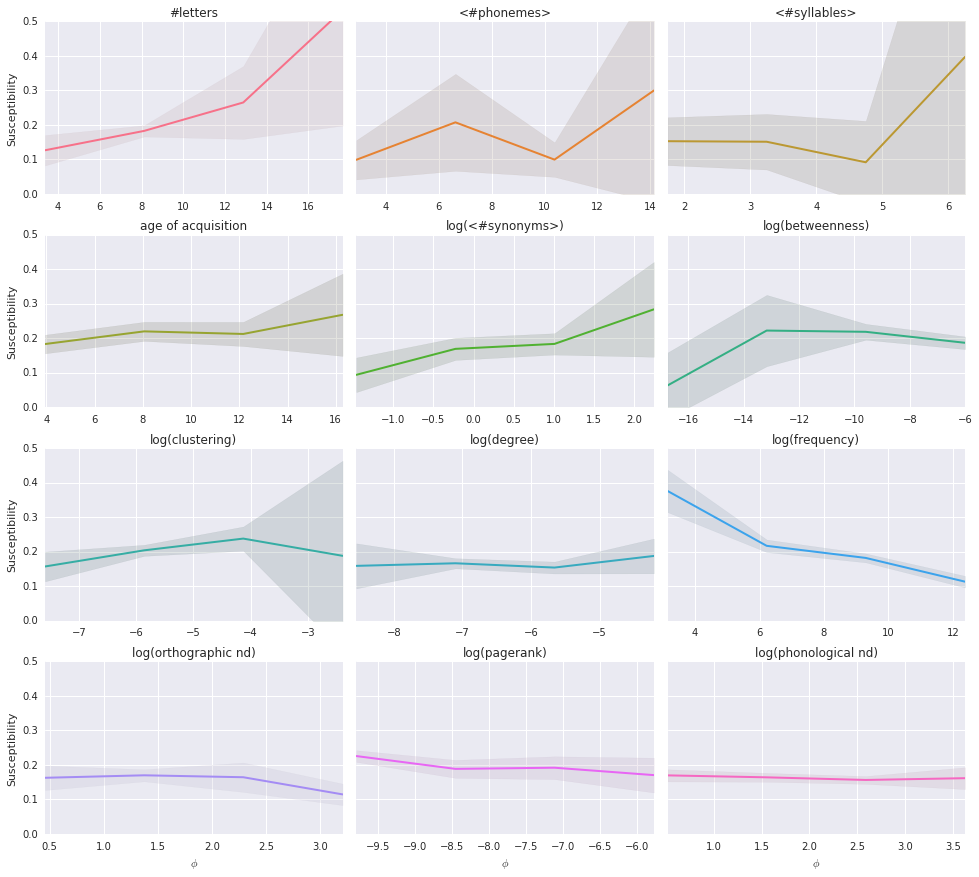

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=susties, col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_susties)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative values.

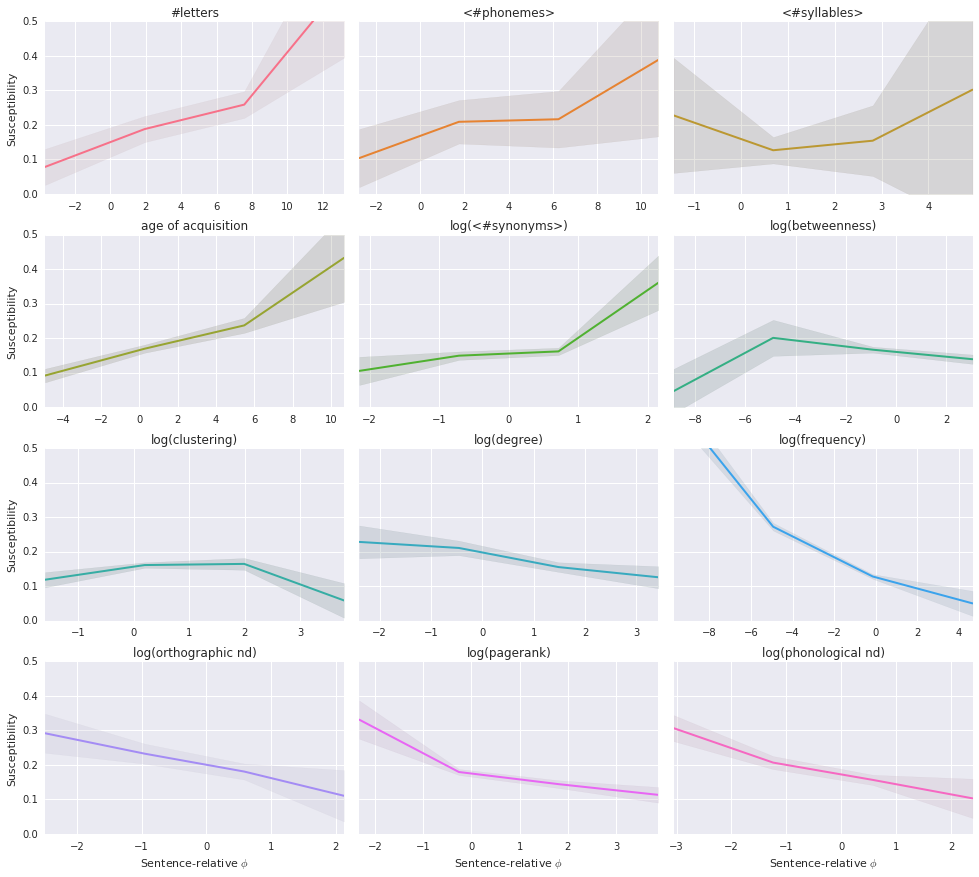

In [8]:
g = sb.FacetGrid(data=susties_rel, col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_susties, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'Sentence-relative $\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

**Note on how confidence intervals are computed here**

There are three ways I can conceive of the computation represented in the graphs above:
1. For each word, we look at how many times it is substituted versus how many times it appears in a position where it could have been substituted. This is the *word*'s susceptibility, $\sigma(w)$. Then for each feature bin $b_i$ we take all the words such that $\phi(w) \in b_i$, average, and compute an asymptotic confidence interval based on how many words are in the bin. This fails for sentence-relative features, because a given word has different feature values depending on the sentence it appears in. So we discard this.
2. Do the same but at the feature value level. So we define a *feature value* susceptibility, $\sigma(f)$, and compute a confidence interval based on how many different feature values we have in the bin. The idea behind (1) and (2) is to look at the bin middle-value like the relevant object we're measuring, and we have several measures for each bin middle-value, hence the confidence interval. This is the way CIs are computed above.
3. Consider that we sample a multinomial process: each substitution is in fact the sampling of a feature value from one of the four bins. In that case, we can compute multinomial proportion CIs. This is also not satisfactory since in most cases not all feature values are available at the time of sampling, since most sentences don't range over all the feature's values. So for now I'm sticking with (2).

### 2.2 Feature susceptibilities, reduced to features we expose in the paper

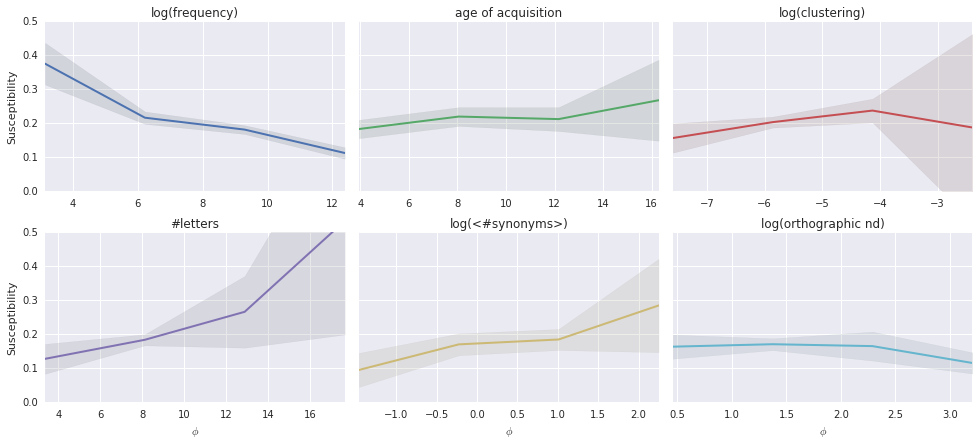

In [9]:
g = sb.FacetGrid(data=susties[susties['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_susties)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative values.

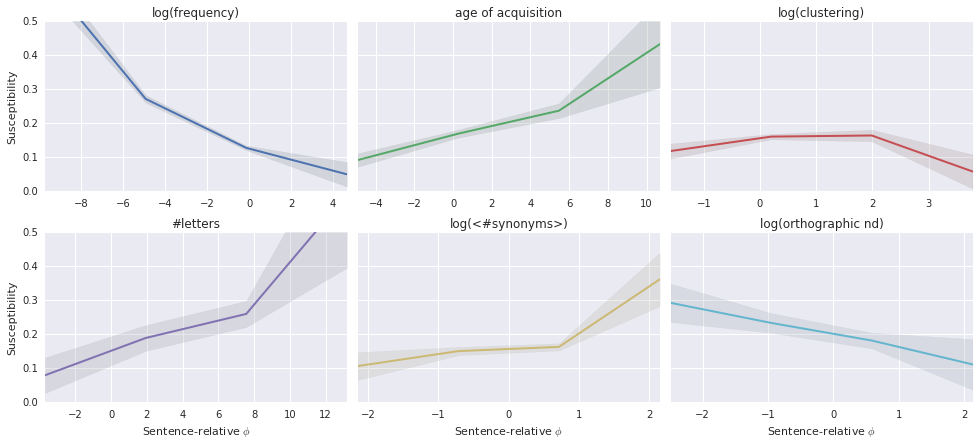

In [10]:
g = sb.FacetGrid(data=susties_rel[susties_rel['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_susties, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'Sentence-relative $\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

## 3 On which POS tags do substitutions fall?

In [11]:
poses = susty_words[susty_words.feature == 'aoa'][['POS', 'cluster_id', 'destination_id',
                                                   'occurrence', 'source_id', 'target',
                                                   'weight', 'weight_appeared', 'word']]
# Only take first letter of POS code to denote categories,
# and group stopword-like categories together.
stop_poses = ['C', 'F', 'I', 'M', 'P', 'S', 'U']
poses['rPOS'] = poses['POS']\
    .apply(lambda x: x[0])\
    .apply(lambda x: 'Stopword-like' if x in stop_poses else x)

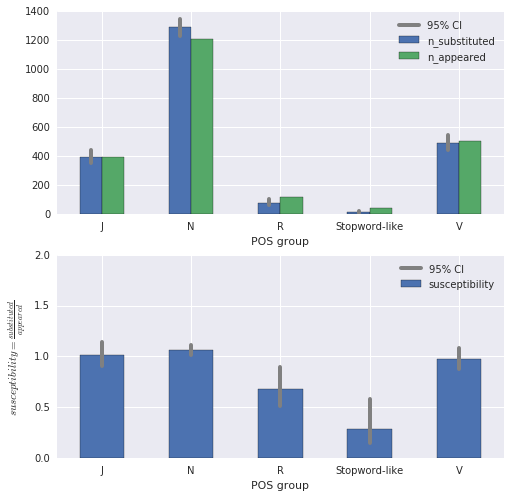

In [12]:
# Compute POS counts.
susty_pos = lambda x: ((x * poses.loc[x.index, 'weight']).sum() /
                       poses.loc[x.index, 'weight_appeared'].sum())
susties_pos = poses.groupby('rPOS')['target'].aggregate(
    {'susceptibility': susty_pos,
     'n_substituted': lambda x: (x * poses.loc[x.index, 'weight']).sum(),
     'n_appeared': lambda x: poses.loc[x.index, 'weight_appeared'].sum()}
).rename_axis('POS group')

# Plot.

fig, axes = plt.subplots(2, 1, figsize=(8, 8))
# Raw substituted and appeared values.
susties_pos[['n_substituted', 'n_appeared']].plot(ax=axes[0], kind='bar', rot=0)
# With their CIs.
total_substituted = susties_pos.n_substituted.sum()
cis = multinomial_proportions_confint(susties_pos.n_substituted.round(), method='goodman')
for i in range(len(susties_pos)):
    axes[0].plot([i-.125, i-.125], cis[i] * total_substituted, lw=4, color='grey',
                 label='95% CI' if i == 0 else None)
axes[0].legend()
# Substitutability values.
susties_pos['susceptibility'].plot(ax=axes[1], kind='bar', legend=True, ylim=(0, 2), rot=0)
axes[1].set_ylabel(r'$susceptibility = \frac{substituted}{appeared}$')
# With their CIs.
for i in range(len(susties_pos)):
    axes[1].plot([i, i], cis[i] * total_substituted / susties_pos.n_appeared.iloc[i],
                 lw=4, color='grey', label='95% CI' if i == 0 else None)
axes[1].legend(loc='best')
# Save if necessary.
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-pos_susceptibilities'),
                bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're in case (3) of the above explanation on confidence intervals (in section 2): it's really like a multinomial sampling, but not quite since not all POS tags are available to sample from in all the sentences. There's no way out of this, so we're going to use multinomial CIs. We can safely scale all the bars and CIs to their respective `n_appeared` values, since that is an independent given before the sampling.

**Are the appeared and substituted proportions statistically different?**

The only test we can easily do is a multinomial goodness-of-fit. This tells us if the `n_substituted` counts are significantly different from the reference `n_appeared` counts.

From there on we know a few things:
* Comparing a given POS's `n_substituted` count to its reference `n_appeared` count tells us if it's statistically different (< or >). We know this will be true individually for any POS that is out of its confidence region for the global goodness-of-fit test, since it's a weaker hypothesis (so the null rejection region will be wider, and the POS we're looking at is already in the rejection region for the global test). We don't know if it'll be true or not for POSes that are in their confidence region for the global test.
* Jointly comparing two POS's `n_substituted` counts to their reference `n_appeared` counts tells us if there is bias for one w.r.t. the other. This is also true for all pairs of POSes that are on alternate sides of their confidence region in the global test (for the same reasons as in the previous point). We don't know if it's true for the other POSes though.

In [13]:
# Test the n_substituted proportions are different from the n_appeared proportions
total_appeared = susties_pos.n_appeared.sum()
appeared_cis = multinomial_proportions_confint(susties_pos.n_appeared.round(), method='goodman')
differences = [(s < ci[0] * total_appeared) or (s > ci[1] * total_appeared)
               for s, ci in zip(susties_pos.n_substituted, appeared_cis)]
are_different = np.any(differences)
if are_different:
    print("Appeared and substituted proportions are different with p < .05")
    print("The following POS tags are out of their confidence region:",
          list(susties_pos.index[np.where(differences)[0]]))
else:
    print("Appeared and substituted proportions cannot be "
          "said different with p value better than .05")

Appeared and substituted proportions are different with p < .05
The following POS tags are out of their confidence region: ['N', 'R', 'Stopword-like']


## 4 Susceptibility in terms of absolute fractiles

In [14]:
def plot_absolute_fractile_distribution(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')

    # Compute feature bins.
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_fractiles = pd.qcut(data.value, bin_count, labels=False)
            break
        except ValueError:
            pass

    # Compute bin counts
    heights = np.zeros(bin_count)
    for i in range(bin_count):
        heights[i] = data[data.target & (x_fractiles == i)].weight.sum()
    total = sum(heights)
    cis = multinomial_proportions_confint(heights.round(), method='goodman') * total
    
    # Plot them.
    plt.plot(range(1, bin_count + 1), heights, color=color)
    plt.fill_between(range(1, bin_count + 1), cis[:, 0], cis[:, 1],
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xticks(range(1, bin_count + 1))
    plt.xlim(1, bin_count)
    plt.ylim(0, None)

### 4.1 All features susceptibilities

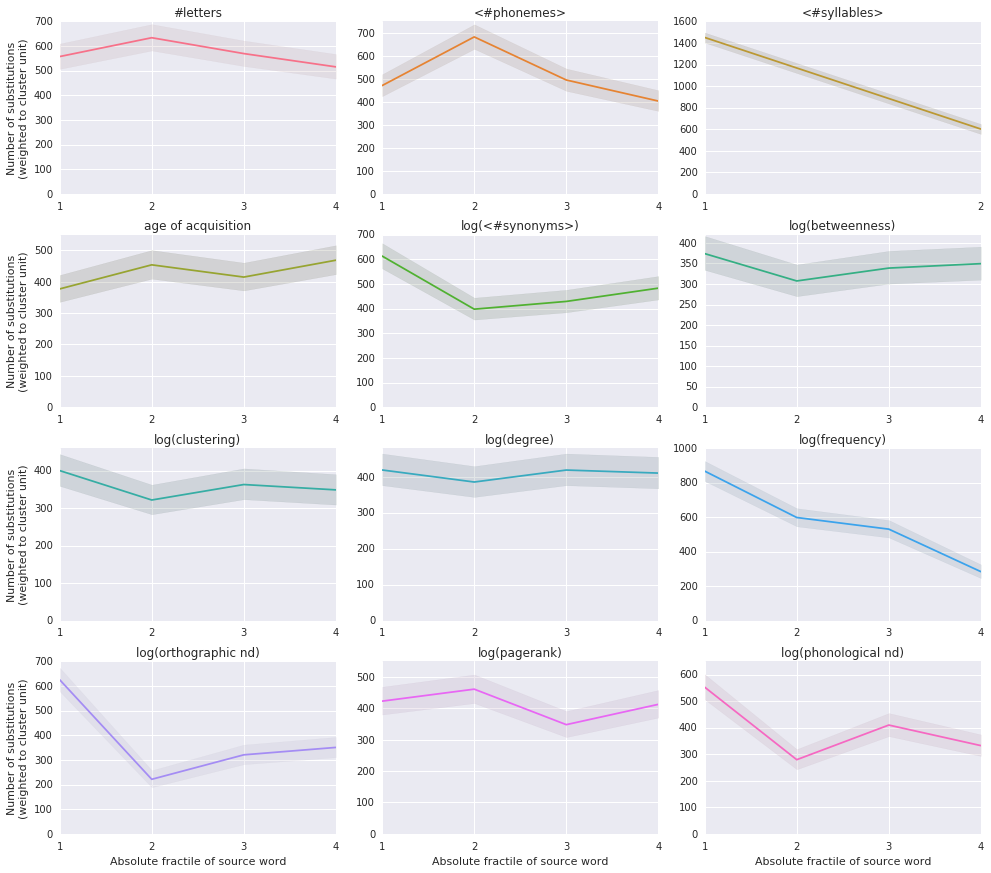

In [15]:
# Now plot.
g = sb.FacetGrid(data=susty_words, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_absolute_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Absolute fractile of source word')
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-fractile_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're again in case (3) of the above explanation on confidence intervals (in section 2): it's really like a multinomial sampling, but not quite since not all absolute feature fractiles are available to sample from in all the sentences. Again, there's no way out of this, so we're going to use multinomial CIs.

### 4.2 Feature susceptibilities, reduced to features we expose in the paper

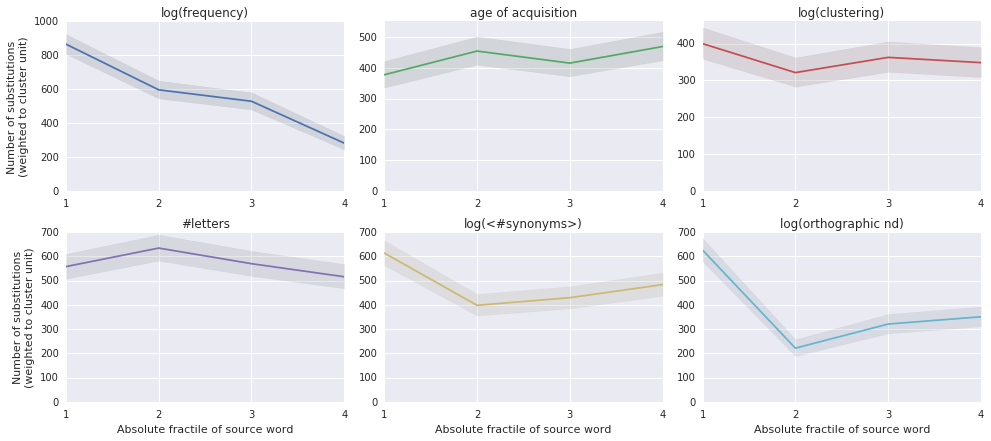

In [16]:
# Now plot.
g = sb.FacetGrid(data=susty_words[susty_words['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_absolute_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Absolute fractile of source word')
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-fractile_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

## 5 Susceptibility in terms of sentence fractiles

Build our data.

In [17]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, _ = substitution.features(feature)
            if np.isnan(source):
                # The source word has no feature value. We drop this substitution.
                continue
            sentence, _ = substitution.source_destination_features(feature)
            # Remove stopwords from this analysis, since we dropped substitutions on stopwords.
            dslice = slice(substitution.start,
                           substitution.start + len(substitution.destination.tokens))
            is_stopword = np.array([(lemma in stopwords) or (token in stopwords)
                                    for (lemma, token) in
                                    zip(substitution.source.lemmas[dslice],
                                        substitution.source.tokens[dslice])])
            sentence[is_stopword] = np.nan
            # Find the number of bins we'll use.
            values = set(sentence[np.isfinite(sentence)])
            if len(values) == 0 or len(values) == 1:
                # Only NaNs, or only one feature value. Drop this.
                continue
            start, stop = None, None
            power = 0
            while start is None:
                if int(BIN_COUNT / 2**power) * 2**power != BIN_COUNT:
                    raise ValueError('BIN_COUNT must be a power of 2')
                try:
                    start = 2**power * pd.qcut(sentence, int(BIN_COUNT / 2**power),
                                               labels=False)[substitution.position]
                    stop = start + 2**power
                except ValueError:
                    power += 1
            # And finally save the bin.
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'start': start,
                         'stop': stop})

original_fractiles = pd.DataFrame(data)
del data

  0% (   92 of 65706) |                    | Elapsed Time: 0:00:01 ETA:  0:11:58

  0% (  180 of 65706) |                    | Elapsed Time: 0:00:02 ETA:  0:12:27

  0% (  262 of 65706) |                    | Elapsed Time: 0:00:03 ETA:  0:12:54

  0% (  342 of 65706) |                    | Elapsed Time: 0:00:04 ETA:  0:13:08

  0% (  425 of 65706) |                    | Elapsed Time: 0:00:05 ETA:  0:13:08

  0% (  505 of 65706) |                    | Elapsed Time: 0:00:06 ETA:  0:13:14

  0% (  597 of 65706) |                    | Elapsed Time: 0:00:07 ETA:  0:12:58

  1% (  686 of 65706) |                    | Elapsed Time: 0:00:08 ETA:  0:12:51

  1% (  778 of 65706) |                    | Elapsed Time: 0:00:09 ETA:  0:12:42

  1% (  822 of 65706) |                    | Elapsed Time: 0:00:09 ETA:  0:12:41

  1% (  919 of 65706) |                    | Elapsed Time: 0:00:10 ETA:  0:12:31

  1% ( 1010 of 65706) |                    | Elapsed Time: 0:00:11 ETA:  0:12:21

  1% ( 1103 of 65706) |                    | Elapsed Time: 0:00:12 ETA:  0:12:07

  1% ( 1183 of 65706) |                    | Elapsed Time: 0:00:13 ETA:  0:12:09

  1% ( 1283 of 65706) |                    | Elapsed Time: 0:00:14 ETA:  0:11:49

  2% ( 1388 of 65706) |                    | Elapsed Time: 0:00:15 ETA:  0:11:36

  2% ( 1497 of 65706) |                    | Elapsed Time: 0:00:16 ETA:  0:11:17

  2% ( 1607 of 65706) |                    | Elapsed Time: 0:00:17 ETA:  0:11:01

  2% ( 1643 of 65706) |                    | Elapsed Time: 0:00:17 ETA:  0:10:55

  2% ( 1742 of 65706) |                    | Elapsed Time: 0:00:19 ETA:  0:10:53

  2% ( 1855 of 65706) |                    | Elapsed Time: 0:00:20 ETA:  0:10:34

  2% ( 1931 of 65706) |                    | Elapsed Time: 0:00:21 ETA:  0:10:47

  3% ( 2009 of 65706) |                    | Elapsed Time: 0:00:22 ETA:  0:10:48

  3% ( 2087 of 65706) |                    | Elapsed Time: 0:00:23 ETA:  0:11:05

  3% ( 2167 of 65706) |                    | Elapsed Time: 0:00:24 ETA:  0:11:26

  3% ( 2244 of 65706) |                    | Elapsed Time: 0:00:25 ETA:  0:11:55

  3% ( 2323 of 65706) |                    | Elapsed Time: 0:00:26 ETA:  0:12:26

  3% ( 2402 of 65706) |                    | Elapsed Time: 0:00:27 ETA:  0:12:37

  3% ( 2464 of 65706) |                    | Elapsed Time: 0:00:27 ETA:  0:13:00

  3% ( 2542 of 65706) |                    | Elapsed Time: 0:00:28 ETA:  0:13:40

  4% ( 2635 of 65706) |                    | Elapsed Time: 0:00:29 ETA:  0:13:18

  4% ( 2729 of 65706) |                    | Elapsed Time: 0:00:30 ETA:  0:12:58

  4% ( 2801 of 65706) |                    | Elapsed Time: 0:00:31 ETA:  0:13:04

  4% ( 2876 of 65706) |                    | Elapsed Time: 0:00:32 ETA:  0:13:09

  4% ( 2951 of 65706) |                    | Elapsed Time: 0:00:33 ETA:  0:13:11

  4% ( 3025 of 65706) |                    | Elapsed Time: 0:00:34 ETA:  0:13:15

  4% ( 3116 of 65706) |                    | Elapsed Time: 0:00:35 ETA:  0:13:00

  5% ( 3286 of 65706) |#                   | Elapsed Time: 0:00:37 ETA:  0:11:27

  5% ( 3442 of 65706) |#                   | Elapsed Time: 0:00:38 ETA:  0:10:29

  5% ( 3605 of 65706) |#                   | Elapsed Time: 0:00:39 ETA:  0:09:36

  5% ( 3763 of 65706) |#                   | Elapsed Time: 0:00:40 ETA:  0:08:40

  5% ( 3919 of 65706) |#                   | Elapsed Time: 0:00:41 ETA:  0:07:55

  6% ( 4070 of 65706) |#                   | Elapsed Time: 0:00:42 ETA:  0:07:19

  6% ( 4107 of 65706) |#                   | Elapsed Time: 0:00:42 ETA:  0:06:54

  6% ( 4193 of 65706) |#                   | Elapsed Time: 0:00:43 ETA:  0:06:55

  6% ( 4274 of 65706) |#                   | Elapsed Time: 0:00:44 ETA:  0:07:22

  6% ( 4359 of 65706) |#                   | Elapsed Time: 0:00:45 ETA:  0:07:46

  6% ( 4443 of 65706) |#                   | Elapsed Time: 0:00:46 ETA:  0:08:21

  6% ( 4529 of 65706) |#                   | Elapsed Time: 0:00:47 ETA:  0:09:06

  7% ( 4618 of 65706) |#                   | Elapsed Time: 0:00:48 ETA:  0:09:53

  7% ( 4705 of 65706) |#                   | Elapsed Time: 0:00:49 ETA:  0:10:48

  7% ( 4806 of 65706) |#                   | Elapsed Time: 0:00:50 ETA:  0:11:35

  7% ( 4894 of 65706) |#                   | Elapsed Time: 0:00:51 ETA:  0:11:43

  7% ( 4928 of 65706) |#                   | Elapsed Time: 0:00:51 ETA:  0:11:38

  7% ( 5024 of 65706) |#                   | Elapsed Time: 0:00:52 ETA:  0:11:22

  7% ( 5135 of 65706) |#                   | Elapsed Time: 0:00:53 ETA:  0:10:57

  7% ( 5224 of 65706) |#                   | Elapsed Time: 0:00:54 ETA:  0:10:52

  8% ( 5328 of 65706) |#                   | Elapsed Time: 0:00:55 ETA:  0:10:34

  8% ( 5444 of 65706) |#                   | Elapsed Time: 0:00:56 ETA:  0:10:11

  8% ( 5555 of 65706) |#                   | Elapsed Time: 0:00:57 ETA:  0:09:52

  8% ( 5655 of 65706) |#                   | Elapsed Time: 0:00:58 ETA:  0:09:51

  8% ( 5750 of 65706) |#                   | Elapsed Time: 0:00:59 ETA:  0:09:51

  8% ( 5838 of 65706) |#                   | Elapsed Time: 0:01:01 ETA:  0:09:57

  9% ( 5924 of 65706) |#                   | Elapsed Time: 0:01:02 ETA:  0:10:17

  9% ( 6011 of 65706) |#                   | Elapsed Time: 0:01:03 ETA:  0:10:18

  9% ( 6106 of 65706) |#                   | Elapsed Time: 0:01:04 ETA:  0:10:25

  9% ( 6248 of 65706) |#                   | Elapsed Time: 0:01:05 ETA:  0:10:02

  9% ( 6365 of 65706) |#                   | Elapsed Time: 0:01:06 ETA:  0:09:56

  9% ( 6494 of 65706) |#                   | Elapsed Time: 0:01:07 ETA:  0:09:32

 10% ( 6571 of 65706) |##                  | Elapsed Time: 0:01:07 ETA:  0:09:09

 10% ( 6663 of 65706) |##                  | Elapsed Time: 0:01:08 ETA:  0:09:16

 10% ( 6754 of 65706) |##                  | Elapsed Time: 0:01:09 ETA:  0:09:12

 10% ( 6848 of 65706) |##                  | Elapsed Time: 0:01:10 ETA:  0:09:06

 10% ( 6939 of 65706) |##                  | Elapsed Time: 0:01:11 ETA:  0:09:02

 10% ( 7033 of 65706) |##                  | Elapsed Time: 0:01:12 ETA:  0:09:02

 10% ( 7133 of 65706) |##                  | Elapsed Time: 0:01:13 ETA:  0:09:30

 11% ( 7228 of 65706) |##                  | Elapsed Time: 0:01:14 ETA:  0:09:45

 11% ( 7321 of 65706) |##                  | Elapsed Time: 0:01:15 ETA:  0:10:12

 11% ( 7392 of 65706) |##                  | Elapsed Time: 0:01:16 ETA:  0:10:27

 11% ( 7486 of 65706) |##                  | Elapsed Time: 0:01:17 ETA:  0:10:24

 11% ( 7578 of 65706) |##                  | Elapsed Time: 0:01:18 ETA:  0:10:23

 11% ( 7672 of 65706) |##                  | Elapsed Time: 0:01:19 ETA:  0:10:22

 11% ( 7767 of 65706) |##                  | Elapsed Time: 0:01:20 ETA:  0:10:17

 11% ( 7859 of 65706) |##                  | Elapsed Time: 0:01:21 ETA:  0:10:18

 12% ( 7953 of 65706) |##                  | Elapsed Time: 0:01:22 ETA:  0:10:22

 12% ( 8044 of 65706) |##                  | Elapsed Time: 0:01:23 ETA:  0:10:24

 12% ( 8137 of 65706) |##                  | Elapsed Time: 0:01:24 ETA:  0:10:23

 12% ( 8214 of 65706) |##                  | Elapsed Time: 0:01:25 ETA:  0:10:23

 12% ( 8307 of 65706) |##                  | Elapsed Time: 0:01:26 ETA:  0:10:22

 12% ( 8400 of 65706) |##                  | Elapsed Time: 0:01:27 ETA:  0:10:21

 12% ( 8501 of 65706) |##                  | Elapsed Time: 0:01:28 ETA:  0:10:14

 13% ( 8605 of 65706) |##                  | Elapsed Time: 0:01:29 ETA:  0:10:06

 13% ( 8708 of 65706) |##                  | Elapsed Time: 0:01:30 ETA:  0:09:56

 13% ( 8812 of 65706) |##                  | Elapsed Time: 0:01:31 ETA:  0:09:47

 13% ( 8915 of 65706) |##                  | Elapsed Time: 0:01:32 ETA:  0:09:37

 13% ( 9035 of 65706) |##                  | Elapsed Time: 0:01:33 ETA:  0:09:22

 13% ( 9156 of 65706) |##                  | Elapsed Time: 0:01:34 ETA:  0:08:59

 14% ( 9266 of 65706) |##                  | Elapsed Time: 0:01:35 ETA:  0:08:46

 14% ( 9373 of 65706) |##                  | Elapsed Time: 0:01:36 ETA:  0:08:41

 14% ( 9472 of 65706) |##                  | Elapsed Time: 0:01:37 ETA:  0:08:43

 14% ( 9570 of 65706) |##                  | Elapsed Time: 0:01:38 ETA:  0:08:46

 14% ( 9678 of 65706) |##                  | Elapsed Time: 0:01:39 ETA:  0:08:42

 14% ( 9762 of 65706) |##                  | Elapsed Time: 0:01:40 ETA:  0:08:55

 15% ( 9856 of 65706) |###                 | Elapsed Time: 0:01:41 ETA:  0:09:11

 15% ( 9941 of 65706) |###                 | Elapsed Time: 0:01:42 ETA:  0:09:40

 15% (10024 of 65706) |###                 | Elapsed Time: 0:01:43 ETA:  0:10:04

 15% (10109 of 65706) |###                 | Elapsed Time: 0:01:44 ETA:  0:10:23

 15% (10198 of 65706) |###                 | Elapsed Time: 0:01:45 ETA:  0:10:32

 15% (10293 of 65706) |###                 | Elapsed Time: 0:01:46 ETA:  0:10:34

 15% (10386 of 65706) |###                 | Elapsed Time: 0:01:47 ETA:  0:10:48

 15% (10478 of 65706) |###                 | Elapsed Time: 0:01:48 ETA:  0:10:39

 16% (10570 of 65706) |###                 | Elapsed Time: 0:01:49 ETA:  0:10:29

 16% (10678 of 65706) |###                 | Elapsed Time: 0:01:50 ETA:  0:10:19

 16% (10769 of 65706) |###                 | Elapsed Time: 0:01:51 ETA:  0:10:09

 16% (10865 of 65706) |###                 | Elapsed Time: 0:01:52 ETA:  0:09:58

 16% (10962 of 65706) |###                 | Elapsed Time: 0:01:53 ETA:  0:09:50

 16% (11056 of 65706) |###                 | Elapsed Time: 0:01:54 ETA:  0:09:49

 16% (11155 of 65706) |###                 | Elapsed Time: 0:01:55 ETA:  0:09:43

 17% (11251 of 65706) |###                 | Elapsed Time: 0:01:56 ETA:  0:09:39

 17% (11346 of 65706) |###                 | Elapsed Time: 0:01:57 ETA:  0:09:35

 17% (11442 of 65706) |###                 | Elapsed Time: 0:01:58 ETA:  0:09:32

 17% (11499 of 65706) |###                 | Elapsed Time: 0:01:59 ETA:  0:09:32

 17% (11597 of 65706) |###                 | Elapsed Time: 0:02:00 ETA:  0:09:25

 17% (11694 of 65706) |###                 | Elapsed Time: 0:02:01 ETA:  0:09:23

 17% (11790 of 65706) |###                 | Elapsed Time: 0:02:02 ETA:  0:09:22

 18% (11889 of 65706) |###                 | Elapsed Time: 0:02:03 ETA:  0:09:18

 18% (11988 of 65706) |###                 | Elapsed Time: 0:02:04 ETA:  0:09:17

 18% (12086 of 65706) |###                 | Elapsed Time: 0:02:05 ETA:  0:09:14

 18% (12185 of 65706) |###                 | Elapsed Time: 0:02:06 ETA:  0:09:10

 18% (12284 of 65706) |###                 | Elapsed Time: 0:02:07 ETA:  0:09:06

 18% (12320 of 65706) |###                 | Elapsed Time: 0:02:07 ETA:  0:09:03

 18% (12419 of 65706) |###                 | Elapsed Time: 0:02:08 ETA:  0:09:02

 19% (12517 of 65706) |###                 | Elapsed Time: 0:02:09 ETA:  0:09:00

 19% (12616 of 65706) |###                 | Elapsed Time: 0:02:10 ETA:  0:08:57

 19% (12715 of 65706) |###                 | Elapsed Time: 0:02:11 ETA:  0:08:55

 19% (12814 of 65706) |###                 | Elapsed Time: 0:02:12 ETA:  0:08:54

 19% (12914 of 65706) |###                 | Elapsed Time: 0:02:13 ETA:  0:08:52

 19% (13012 of 65706) |###                 | Elapsed Time: 0:02:14 ETA:  0:08:51

 19% (13111 of 65706) |###                 | Elapsed Time: 0:02:15 ETA:  0:08:50

 20% (13142 of 65706) |####                | Elapsed Time: 0:02:16 ETA:  0:08:52

 20% (13237 of 65706) |####                | Elapsed Time: 0:02:17 ETA:  0:08:55

 20% (13333 of 65706) |####                | Elapsed Time: 0:02:18 ETA:  0:08:56

 20% (13430 of 65706) |####                | Elapsed Time: 0:02:19 ETA:  0:08:56

 20% (13530 of 65706) |####                | Elapsed Time: 0:02:20 ETA:  0:08:55

 20% (13629 of 65706) |####                | Elapsed Time: 0:02:21 ETA:  0:08:54

 20% (13728 of 65706) |####                | Elapsed Time: 0:02:22 ETA:  0:08:54

 21% (13827 of 65706) |####                | Elapsed Time: 0:02:23 ETA:  0:08:52

 21% (13928 of 65706) |####                | Elapsed Time: 0:02:24 ETA:  0:08:49

 21% (13963 of 65706) |####                | Elapsed Time: 0:02:24 ETA:  0:08:47

 21% (14062 of 65706) |####                | Elapsed Time: 0:02:25 ETA:  0:08:42

 21% (14161 of 65706) |####                | Elapsed Time: 0:02:26 ETA:  0:08:39

 21% (14261 of 65706) |####                | Elapsed Time: 0:02:27 ETA:  0:08:35

 21% (14360 of 65706) |####                | Elapsed Time: 0:02:28 ETA:  0:08:35

 21% (14445 of 65706) |####                | Elapsed Time: 0:02:29 ETA:  0:08:45

 22% (14526 of 65706) |####                | Elapsed Time: 0:02:30 ETA:  0:09:00

 22% (14607 of 65706) |####                | Elapsed Time: 0:02:31 ETA:  0:09:15

 22% (14687 of 65706) |####                | Elapsed Time: 0:02:32 ETA:  0:09:33

 22% (14784 of 65706) |####                | Elapsed Time: 0:02:33 ETA:  0:09:51

 22% (14880 of 65706) |####                | Elapsed Time: 0:02:34 ETA:  0:09:53

 22% (14971 of 65706) |####                | Elapsed Time: 0:02:35 ETA:  0:10:02

 22% (15073 of 65706) |####                | Elapsed Time: 0:02:36 ETA:  0:09:58

 23% (15160 of 65706) |####                | Elapsed Time: 0:02:37 ETA:  0:09:55

 23% (15238 of 65706) |####                | Elapsed Time: 0:02:38 ETA:  0:09:57

 23% (15316 of 65706) |####                | Elapsed Time: 0:02:39 ETA:  0:09:59

 23% (15395 of 65706) |####                | Elapsed Time: 0:02:40 ETA:  0:09:59

 23% (15479 of 65706) |####                | Elapsed Time: 0:02:41 ETA:  0:09:57

 23% (15559 of 65706) |####                | Elapsed Time: 0:02:45 ETA:  0:13:17

 23% (15606 of 65706) |####                | Elapsed Time: 0:02:45 ETA:  0:13:30

 23% (15710 of 65706) |####                | Elapsed Time: 0:02:46 ETA:  0:13:13

 24% (15812 of 65706) |####                | Elapsed Time: 0:02:47 ETA:  0:13:11

 24% (15917 of 65706) |####                | Elapsed Time: 0:02:48 ETA:  0:12:47

 24% (16017 of 65706) |####                | Elapsed Time: 0:02:49 ETA:  0:12:20

 24% (16123 of 65706) |####                | Elapsed Time: 0:02:50 ETA:  0:11:48

 24% (16226 of 65706) |####                | Elapsed Time: 0:02:51 ETA:  0:11:21

 24% (16324 of 65706) |####                | Elapsed Time: 0:02:52 ETA:  0:11:07

 24% (16407 of 65706) |####                | Elapsed Time: 0:02:53 ETA:  0:08:04

 25% (16427 of 65706) |#####               | Elapsed Time: 0:02:54 ETA:  0:08:11

 25% (16503 of 65706) |#####               | Elapsed Time: 0:02:55 ETA:  0:08:34

 25% (16628 of 65706) |#####               | Elapsed Time: 0:02:56 ETA:  0:08:14

 25% (16782 of 65706) |#####               | Elapsed Time: 0:02:57 ETA:  0:07:34

 25% (16894 of 65706) |#####               | Elapsed Time: 0:02:58 ETA:  0:07:24

 25% (17038 of 65706) |#####               | Elapsed Time: 0:02:59 ETA:  0:06:57

 26% (17148 of 65706) |#####               | Elapsed Time: 0:03:00 ETA:  0:06:51

 26% (17248 of 65706) |#####               | Elapsed Time: 0:03:01 ETA:  0:06:40

 26% (17336 of 65706) |#####               | Elapsed Time: 0:03:02 ETA:  0:06:49

 26% (17426 of 65706) |#####               | Elapsed Time: 0:03:03 ETA:  0:06:38

 26% (17511 of 65706) |#####               | Elapsed Time: 0:03:04 ETA:  0:07:04

 26% (17595 of 65706) |#####               | Elapsed Time: 0:03:05 ETA:  0:07:55

 26% (17712 of 65706) |#####               | Elapsed Time: 0:03:06 ETA:  0:07:51

 27% (17826 of 65706) |#####               | Elapsed Time: 0:03:07 ETA:  0:08:15

 27% (17948 of 65706) |#####               | Elapsed Time: 0:03:08 ETA:  0:08:04

 27% (18037 of 65706) |#####               | Elapsed Time: 0:03:09 ETA:  0:08:01

 27% (18070 of 65706) |#####               | Elapsed Time: 0:03:09 ETA:  0:08:02

 27% (18149 of 65706) |#####               | Elapsed Time: 0:03:10 ETA:  0:08:10

 27% (18224 of 65706) |#####               | Elapsed Time: 0:03:11 ETA:  0:08:21

 27% (18299 of 65706) |#####               | Elapsed Time: 0:03:12 ETA:  0:08:30

 27% (18378 of 65706) |#####               | Elapsed Time: 0:03:13 ETA:  0:08:33

 28% (18458 of 65706) |#####               | Elapsed Time: 0:03:14 ETA:  0:09:06

 28% (18575 of 65706) |#####               | Elapsed Time: 0:03:15 ETA:  0:09:02

 28% (18701 of 65706) |#####               | Elapsed Time: 0:03:16 ETA:  0:08:57

 28% (18826 of 65706) |#####               | Elapsed Time: 0:03:17 ETA:  0:08:22

 28% (18891 of 65706) |#####               | Elapsed Time: 0:03:18 ETA:  0:08:06

 28% (19015 of 65706) |#####               | Elapsed Time: 0:03:19 ETA:  0:07:29

 29% (19139 of 65706) |#####               | Elapsed Time: 0:03:20 ETA:  0:06:53

 29% (19229 of 65706) |#####               | Elapsed Time: 0:03:21 ETA:  0:06:42

 29% (19316 of 65706) |#####               | Elapsed Time: 0:03:22 ETA:  0:06:36

 29% (19436 of 65706) |#####               | Elapsed Time: 0:03:23 ETA:  0:06:10

 29% (19528 of 65706) |#####               | Elapsed Time: 0:03:24 ETA:  0:06:25

 29% (19609 of 65706) |#####               | Elapsed Time: 0:03:25 ETA:  0:06:53

 29% (19692 of 65706) |#####               | Elapsed Time: 0:03:26 ETA:  0:07:22

 30% (19712 of 65706) |######              | Elapsed Time: 0:03:26 ETA:  0:07:36

 30% (19801 of 65706) |######              | Elapsed Time: 0:03:27 ETA:  0:08:05

 30% (19907 of 65706) |######              | Elapsed Time: 0:03:28 ETA:  0:08:20

 30% (20017 of 65706) |######              | Elapsed Time: 0:03:29 ETA:  0:08:01

 30% (20118 of 65706) |######              | Elapsed Time: 0:03:30 ETA:  0:07:48

 30% (20224 of 65706) |######              | Elapsed Time: 0:03:31 ETA:  0:07:59

 30% (20319 of 65706) |######              | Elapsed Time: 0:03:32 ETA:  0:07:55

 31% (20460 of 65706) |######              | Elapsed Time: 0:03:33 ETA:  0:07:06

 31% (20534 of 65706) |######              | Elapsed Time: 0:03:34 ETA:  0:07:04

 31% (20649 of 65706) |######              | Elapsed Time: 0:03:35 ETA:  0:06:51

 31% (20759 of 65706) |######              | Elapsed Time: 0:03:36 ETA:  0:06:36

 31% (20870 of 65706) |######              | Elapsed Time: 0:03:37 ETA:  0:06:32

 31% (20982 of 65706) |######              | Elapsed Time: 0:03:38 ETA:  0:06:30

 32% (21098 of 65706) |######              | Elapsed Time: 0:03:39 ETA:  0:06:19

 32% (21202 of 65706) |######              | Elapsed Time: 0:03:40 ETA:  0:06:19

 32% (21286 of 65706) |######              | Elapsed Time: 0:03:41 ETA:  0:06:25

 32% (21355 of 65706) |######              | Elapsed Time: 0:03:42 ETA:  0:06:55

 32% (21452 of 65706) |######              | Elapsed Time: 0:03:43 ETA:  0:06:46

 32% (21555 of 65706) |######              | Elapsed Time: 0:03:44 ETA:  0:06:53

 32% (21681 of 65706) |######              | Elapsed Time: 0:03:45 ETA:  0:06:42

 33% (21762 of 65706) |######              | Elapsed Time: 0:03:46 ETA:  0:07:02

 33% (21855 of 65706) |######              | Elapsed Time: 0:03:47 ETA:  0:07:15

 33% (21989 of 65706) |######              | Elapsed Time: 0:03:48 ETA:  0:07:01

 33% (22103 of 65706) |######              | Elapsed Time: 0:03:49 ETA:  0:06:53

 33% (22176 of 65706) |######              | Elapsed Time: 0:03:49 ETA:  0:06:32

 33% (22314 of 65706) |######              | Elapsed Time: 0:03:50 ETA:  0:06:03

 34% (22432 of 65706) |######              | Elapsed Time: 0:03:51 ETA:  0:05:49

 34% (22526 of 65706) |######              | Elapsed Time: 0:03:52 ETA:  0:05:54

 34% (22611 of 65706) |######              | Elapsed Time: 0:03:53 ETA:  0:06:18

 34% (22708 of 65706) |######              | Elapsed Time: 0:03:54 ETA:  0:06:07

 34% (22819 of 65706) |######              | Elapsed Time: 0:03:55 ETA:  0:05:55

 34% (22929 of 65706) |######              | Elapsed Time: 0:03:56 ETA:  0:06:09

 35% (22998 of 65706) |#######             | Elapsed Time: 0:03:57 ETA:  0:06:11

 35% (23108 of 65706) |#######             | Elapsed Time: 0:03:58 ETA:  0:06:13

 35% (23187 of 65706) |#######             | Elapsed Time: 0:03:59 ETA:  0:06:53

 35% (23267 of 65706) |#######             | Elapsed Time: 0:04:00 ETA:  0:07:22

 35% (23353 of 65706) |#######             | Elapsed Time: 0:04:01 ETA:  0:07:28

 35% (23434 of 65706) |#######             | Elapsed Time: 0:04:02 ETA:  0:07:30

 35% (23510 of 65706) |#######             | Elapsed Time: 0:04:03 ETA:  0:07:47

 35% (23613 of 65706) |#######             | Elapsed Time: 0:04:04 ETA:  0:07:52

 36% (23704 of 65706) |#######             | Elapsed Time: 0:04:05 ETA:  0:08:09

 36% (23819 of 65706) |#######             | Elapsed Time: 0:04:06 ETA:  0:08:26

 36% (23918 of 65706) |#######             | Elapsed Time: 0:04:07 ETA:  0:08:04

 36% (24009 of 65706) |#######             | Elapsed Time: 0:04:08 ETA:  0:07:52

 36% (24101 of 65706) |#######             | Elapsed Time: 0:04:09 ETA:  0:07:45

 36% (24190 of 65706) |#######             | Elapsed Time: 0:04:10 ETA:  0:07:36

 36% (24308 of 65706) |#######             | Elapsed Time: 0:04:11 ETA:  0:06:58

 37% (24398 of 65706) |#######             | Elapsed Time: 0:04:12 ETA:  0:07:08

 37% (24484 of 65706) |#######             | Elapsed Time: 0:04:13 ETA:  0:07:12

 37% (24577 of 65706) |#######             | Elapsed Time: 0:04:14 ETA:  0:07:22

 37% (24640 of 65706) |#######             | Elapsed Time: 0:04:15 ETA:  0:07:21

 37% (24735 of 65706) |#######             | Elapsed Time: 0:04:16 ETA:  0:07:23

 37% (24830 of 65706) |#######             | Elapsed Time: 0:04:17 ETA:  0:07:19

 37% (24926 of 65706) |#######             | Elapsed Time: 0:04:18 ETA:  0:07:15

 38% (25020 of 65706) |#######             | Elapsed Time: 0:04:19 ETA:  0:07:11

 38% (25097 of 65706) |#######             | Elapsed Time: 0:04:20 ETA:  0:07:46

 38% (25199 of 65706) |#######             | Elapsed Time: 0:04:21 ETA:  0:07:34

 38% (25298 of 65706) |#######             | Elapsed Time: 0:04:22 ETA:  0:07:21

 38% (25405 of 65706) |#######             | Elapsed Time: 0:04:23 ETA:  0:07:08

 38% (25462 of 65706) |#######             | Elapsed Time: 0:04:23 ETA:  0:07:03

 38% (25564 of 65706) |#######             | Elapsed Time: 0:04:24 ETA:  0:06:56

 39% (25659 of 65706) |#######             | Elapsed Time: 0:04:25 ETA:  0:06:54

 39% (25756 of 65706) |#######             | Elapsed Time: 0:04:26 ETA:  0:06:52

 39% (25829 of 65706) |#######             | Elapsed Time: 0:04:27 ETA:  0:07:09

 39% (25910 of 65706) |#######             | Elapsed Time: 0:04:28 ETA:  0:07:04

 39% (26001 of 65706) |#######             | Elapsed Time: 0:04:29 ETA:  0:07:12

 39% (26080 of 65706) |#######             | Elapsed Time: 0:04:30 ETA:  0:07:30

 39% (26161 of 65706) |#######             | Elapsed Time: 0:04:31 ETA:  0:07:54

 39% (26239 of 65706) |#######             | Elapsed Time: 0:04:33 ETA:  0:08:11

 40% (26283 of 65706) |########            | Elapsed Time: 0:04:33 ETA:  0:08:32

 40% (26375 of 65706) |########            | Elapsed Time: 0:04:34 ETA:  0:08:35

 40% (26477 of 65706) |########            | Elapsed Time: 0:04:35 ETA:  0:08:28

 40% (26595 of 65706) |########            | Elapsed Time: 0:04:36 ETA:  0:07:41

 40% (26698 of 65706) |########            | Elapsed Time: 0:04:37 ETA:  0:07:20

 40% (26806 of 65706) |########            | Elapsed Time: 0:04:38 ETA:  0:07:04

 40% (26895 of 65706) |########            | Elapsed Time: 0:04:39 ETA:  0:06:54

 41% (26995 of 65706) |########            | Elapsed Time: 0:04:40 ETA:  0:06:37

 41% (27104 of 65706) |########            | Elapsed Time: 0:04:41 ETA:  0:06:09

 41% (27203 of 65706) |########            | Elapsed Time: 0:04:42 ETA:  0:06:02

 41% (27295 of 65706) |########            | Elapsed Time: 0:04:43 ETA:  0:06:09

 41% (27380 of 65706) |########            | Elapsed Time: 0:04:44 ETA:  0:06:35

 41% (27464 of 65706) |########            | Elapsed Time: 0:04:45 ETA:  0:06:50

 41% (27547 of 65706) |########            | Elapsed Time: 0:04:46 ETA:  0:07:13

 42% (27747 of 65706) |########            | Elapsed Time: 0:04:47 ETA:  0:05:38

 42% (27875 of 65706) |########            | Elapsed Time: 0:04:48 ETA:  0:05:17

 42% (27926 of 65706) |########            | Elapsed Time: 0:04:49 ETA:  0:05:19

 42% (28011 of 65706) |########            | Elapsed Time: 0:04:50 ETA:  0:05:34

 42% (28095 of 65706) |########            | Elapsed Time: 0:04:51 ETA:  0:05:44

 42% (28183 of 65706) |########            | Elapsed Time: 0:04:52 ETA:  0:05:45

 43% (28269 of 65706) |########            | Elapsed Time: 0:04:53 ETA:  0:05:44

 43% (28347 of 65706) |########            | Elapsed Time: 0:04:54 ETA:  0:05:47

 43% (28428 of 65706) |########            | Elapsed Time: 0:04:55 ETA:  0:05:48

 43% (28529 of 65706) |########            | Elapsed Time: 0:04:56 ETA:  0:07:08

 43% (28631 of 65706) |########            | Elapsed Time: 0:04:57 ETA:  0:07:32

 43% (28725 of 65706) |########            | Elapsed Time: 0:04:58 ETA:  0:07:26

 43% (28747 of 65706) |########            | Elapsed Time: 0:04:58 ETA:  0:07:22

 43% (28858 of 65706) |########            | Elapsed Time: 0:04:59 ETA:  0:06:54

 44% (28980 of 65706) |########            | Elapsed Time: 0:05:00 ETA:  0:06:22

 44% (29108 of 65706) |########            | Elapsed Time: 0:05:01 ETA:  0:05:47

 44% (29212 of 65706) |########            | Elapsed Time: 0:05:02 ETA:  0:05:26

 44% (29301 of 65706) |########            | Elapsed Time: 0:05:03 ETA:  0:05:20

 44% (29406 of 65706) |########            | Elapsed Time: 0:05:04 ETA:  0:05:16

 44% (29517 of 65706) |########            | Elapsed Time: 0:05:05 ETA:  0:05:09

 45% (29568 of 65706) |#########           | Elapsed Time: 0:05:06 ETA:  0:04:56

 45% (29658 of 65706) |#########           | Elapsed Time: 0:05:07 ETA:  0:05:04

 45% (29749 of 65706) |#########           | Elapsed Time: 0:05:08 ETA:  0:05:17

 45% (29850 of 65706) |#########           | Elapsed Time: 0:05:09 ETA:  0:05:31

 45% (29950 of 65706) |#########           | Elapsed Time: 0:05:10 ETA:  0:05:52

 45% (30056 of 65706) |#########           | Elapsed Time: 0:05:11 ETA:  0:05:50

 45% (30139 of 65706) |#########           | Elapsed Time: 0:05:12 ETA:  0:05:54

 46% (30228 of 65706) |#########           | Elapsed Time: 0:05:13 ETA:  0:06:05

 46% (30315 of 65706) |#########           | Elapsed Time: 0:05:14 ETA:  0:06:26

 46% (30390 of 65706) |#########           | Elapsed Time: 0:05:15 ETA:  0:06:55

 46% (30469 of 65706) |#########           | Elapsed Time: 0:05:16 ETA:  0:07:06

 46% (30559 of 65706) |#########           | Elapsed Time: 0:05:17 ETA:  0:07:17

 46% (30649 of 65706) |#########           | Elapsed Time: 0:05:18 ETA:  0:07:27

 46% (30730 of 65706) |#########           | Elapsed Time: 0:05:19 ETA:  0:07:54

 46% (30828 of 65706) |#########           | Elapsed Time: 0:05:20 ETA:  0:07:35

 47% (30921 of 65706) |#########           | Elapsed Time: 0:05:21 ETA:  0:07:30

 47% (31006 of 65706) |#########           | Elapsed Time: 0:05:22 ETA:  0:07:30

 47% (31099 of 65706) |#########           | Elapsed Time: 0:05:23 ETA:  0:07:03

 47% (31192 of 65706) |#########           | Elapsed Time: 0:05:24 ETA:  0:06:57

 47% (31211 of 65706) |#########           | Elapsed Time: 0:05:24 ETA:  0:06:46

 47% (31302 of 65706) |#########           | Elapsed Time: 0:05:25 ETA:  0:06:43

 47% (31394 of 65706) |#########           | Elapsed Time: 0:05:26 ETA:  0:06:40

 47% (31489 of 65706) |#########           | Elapsed Time: 0:05:27 ETA:  0:06:25

 48% (31607 of 65706) |#########           | Elapsed Time: 0:05:28 ETA:  0:06:07

 48% (31684 of 65706) |#########           | Elapsed Time: 0:05:29 ETA:  0:06:20

 48% (31769 of 65706) |#########           | Elapsed Time: 0:05:30 ETA:  0:06:19

 48% (31874 of 65706) |#########           | Elapsed Time: 0:05:31 ETA:  0:06:07

 48% (31969 of 65706) |#########           | Elapsed Time: 0:05:32 ETA:  0:06:04

 48% (32032 of 65706) |#########           | Elapsed Time: 0:05:32 ETA:  0:05:45

 48% (32126 of 65706) |#########           | Elapsed Time: 0:05:33 ETA:  0:05:42

 49% (32212 of 65706) |#########           | Elapsed Time: 0:05:34 ETA:  0:05:47

 49% (32281 of 65706) |#########           | Elapsed Time: 0:05:36 ETA:  0:06:09

 49% (32365 of 65706) |#########           | Elapsed Time: 0:05:37 ETA:  0:06:40

 49% (32465 of 65706) |#########           | Elapsed Time: 0:05:38 ETA:  0:06:17

 49% (32554 of 65706) |#########           | Elapsed Time: 0:05:39 ETA:  0:06:13

 49% (32641 of 65706) |#########           | Elapsed Time: 0:05:40 ETA:  0:06:28

 49% (32721 of 65706) |#########           | Elapsed Time: 0:05:41 ETA:  0:06:42

 49% (32804 of 65706) |#########           | Elapsed Time: 0:05:42 ETA:  0:07:09

 50% (32854 of 65706) |##########          | Elapsed Time: 0:05:42 ETA:  0:07:19

 50% (32936 of 65706) |##########          | Elapsed Time: 0:05:43 ETA:  0:07:21

 50% (33021 of 65706) |##########          | Elapsed Time: 0:05:44 ETA:  0:07:03

 50% (33106 of 65706) |##########          | Elapsed Time: 0:05:45 ETA:  0:07:01

 50% (33191 of 65706) |##########          | Elapsed Time: 0:05:46 ETA:  0:07:16

 50% (33286 of 65706) |##########          | Elapsed Time: 0:05:47 ETA:  0:07:09

 50% (33372 of 65706) |##########          | Elapsed Time: 0:05:48 ETA:  0:07:10

 50% (33475 of 65706) |##########          | Elapsed Time: 0:05:49 ETA:  0:06:45

 51% (33579 of 65706) |##########          | Elapsed Time: 0:05:50 ETA:  0:06:24

 51% (33675 of 65706) |##########          | Elapsed Time: 0:05:51 ETA:  0:06:17

 51% (33755 of 65706) |##########          | Elapsed Time: 0:05:52 ETA:  0:06:20

 51% (33837 of 65706) |##########          | Elapsed Time: 0:05:53 ETA:  0:06:22

 51% (33917 of 65706) |##########          | Elapsed Time: 0:05:54 ETA:  0:06:26

 51% (34016 of 65706) |##########          | Elapsed Time: 0:05:55 ETA:  0:06:21

 51% (34145 of 65706) |##########          | Elapsed Time: 0:05:56 ETA:  0:05:38

 52% (34269 of 65706) |##########          | Elapsed Time: 0:05:57 ETA:  0:05:19

 52% (34384 of 65706) |##########          | Elapsed Time: 0:05:58 ETA:  0:05:08

 52% (34496 of 65706) |##########          | Elapsed Time: 0:05:59 ETA:  0:04:43

 52% (34598 of 65706) |##########          | Elapsed Time: 0:06:00 ETA:  0:04:41

 52% (34714 of 65706) |##########          | Elapsed Time: 0:06:01 ETA:  0:04:15

 53% (34828 of 65706) |##########          | Elapsed Time: 0:06:02 ETA:  0:03:54

 53% (34932 of 65706) |##########          | Elapsed Time: 0:06:03 ETA:  0:03:39

 53% (35043 of 65706) |##########          | Elapsed Time: 0:06:04 ETA:  0:03:31

 53% (35139 of 65706) |##########          | Elapsed Time: 0:06:05 ETA:  0:03:50

 53% (35246 of 65706) |##########          | Elapsed Time: 0:06:06 ETA:  0:03:59

 53% (35317 of 65706) |##########          | Elapsed Time: 0:06:07 ETA:  0:04:07

 53% (35422 of 65706) |##########          | Elapsed Time: 0:06:08 ETA:  0:04:12

 54% (35562 of 65706) |##########          | Elapsed Time: 0:06:09 ETA:  0:03:47

 54% (35655 of 65706) |##########          | Elapsed Time: 0:06:10 ETA:  0:04:00

 54% (35768 of 65706) |##########          | Elapsed Time: 0:06:11 ETA:  0:04:00

 54% (35880 of 65706) |##########          | Elapsed Time: 0:06:12 ETA:  0:03:53

 54% (35978 of 65706) |##########          | Elapsed Time: 0:06:13 ETA:  0:04:00

 54% (36016 of 65706) |##########          | Elapsed Time: 0:06:17 ETA:  0:07:37

 54% (36106 of 65706) |##########          | Elapsed Time: 0:06:18 ETA:  0:07:52

 55% (36139 of 65706) |###########         | Elapsed Time: 0:06:18 ETA:  0:08:03

 55% (36268 of 65706) |###########         | Elapsed Time: 0:06:19 ETA:  0:07:38

 55% (36361 of 65706) |###########         | Elapsed Time: 0:06:20 ETA:  0:08:27

 55% (36454 of 65706) |###########         | Elapsed Time: 0:06:21 ETA:  0:08:26

 55% (36549 of 65706) |###########         | Elapsed Time: 0:06:22 ETA:  0:08:47

 55% (36673 of 65706) |###########         | Elapsed Time: 0:06:23 ETA:  0:08:32

 55% (36756 of 65706) |###########         | Elapsed Time: 0:06:24 ETA:  0:08:49

 56% (36858 of 65706) |###########         | Elapsed Time: 0:06:25 ETA:  0:04:32

 56% (36937 of 65706) |###########         | Elapsed Time: 0:06:26 ETA:  0:04:39

 56% (36960 of 65706) |###########         | Elapsed Time: 0:06:26 ETA:  0:04:40

 56% (37059 of 65706) |###########         | Elapsed Time: 0:06:27 ETA:  0:05:04

 56% (37159 of 65706) |###########         | Elapsed Time: 0:06:28 ETA:  0:04:57

 56% (37271 of 65706) |###########         | Elapsed Time: 0:06:29 ETA:  0:04:40

 56% (37371 of 65706) |###########         | Elapsed Time: 0:06:30 ETA:  0:04:34

 57% (37484 of 65706) |###########         | Elapsed Time: 0:06:31 ETA:  0:04:42

 57% (37587 of 65706) |###########         | Elapsed Time: 0:06:32 ETA:  0:04:25

 57% (37697 of 65706) |###########         | Elapsed Time: 0:06:33 ETA:  0:04:17

 57% (37781 of 65706) |###########         | Elapsed Time: 0:06:34 ETA:  0:03:46

 57% (37908 of 65706) |###########         | Elapsed Time: 0:06:35 ETA:  0:03:27

 57% (38019 of 65706) |###########         | Elapsed Time: 0:06:36 ETA:  0:03:18

 58% (38124 of 65706) |###########         | Elapsed Time: 0:06:37 ETA:  0:03:14

 58% (38233 of 65706) |###########         | Elapsed Time: 0:06:38 ETA:  0:03:14

 58% (38321 of 65706) |###########         | Elapsed Time: 0:06:39 ETA:  0:03:21

 58% (38441 of 65706) |###########         | Elapsed Time: 0:06:40 ETA:  0:03:15

 58% (38555 of 65706) |###########         | Elapsed Time: 0:06:41 ETA:  0:03:08

 58% (38603 of 65706) |###########         | Elapsed Time: 0:06:41 ETA:  0:03:09

 58% (38706 of 65706) |###########         | Elapsed Time: 0:06:42 ETA:  0:03:20

 59% (38801 of 65706) |###########         | Elapsed Time: 0:06:43 ETA:  0:03:41

 59% (38901 of 65706) |###########         | Elapsed Time: 0:06:44 ETA:  0:03:48

 59% (38998 of 65706) |###########         | Elapsed Time: 0:06:45 ETA:  0:03:53

 59% (39094 of 65706) |###########         | Elapsed Time: 0:06:46 ETA:  0:04:01

 59% (39208 of 65706) |###########         | Elapsed Time: 0:06:47 ETA:  0:03:42

 59% (39304 of 65706) |###########         | Elapsed Time: 0:06:48 ETA:  0:03:59

 60% (39424 of 65706) |############        | Elapsed Time: 0:06:50 ETA:  0:04:08

 60% (39535 of 65706) |############        | Elapsed Time: 0:06:51 ETA:  0:04:01

 60% (39625 of 65706) |############        | Elapsed Time: 0:06:52 ETA:  0:04:04

 60% (39759 of 65706) |############        | Elapsed Time: 0:06:53 ETA:  0:03:37

 60% (39886 of 65706) |############        | Elapsed Time: 0:06:54 ETA:  0:03:15

 60% (39981 of 65706) |############        | Elapsed Time: 0:06:55 ETA:  0:03:15

 60% (40076 of 65706) |############        | Elapsed Time: 0:06:56 ETA:  0:03:26

 61% (40180 of 65706) |############        | Elapsed Time: 0:06:57 ETA:  0:03:20

 61% (40245 of 65706) |############        | Elapsed Time: 0:06:57 ETA:  0:03:16

 61% (40353 of 65706) |############        | Elapsed Time: 0:06:58 ETA:  0:03:15

 61% (40449 of 65706) |############        | Elapsed Time: 0:06:59 ETA:  0:03:24

 61% (40548 of 65706) |############        | Elapsed Time: 0:07:00 ETA:  0:03:17

 61% (40655 of 65706) |############        | Elapsed Time: 0:07:01 ETA:  0:03:34

 62% (40743 of 65706) |############        | Elapsed Time: 0:07:02 ETA:  0:04:02

 62% (40841 of 65706) |############        | Elapsed Time: 0:07:03 ETA:  0:03:59

 62% (40943 of 65706) |############        | Elapsed Time: 0:07:04 ETA:  0:03:52

 62% (41067 of 65706) |############        | Elapsed Time: 0:07:06 ETA:  0:03:47

 62% (41148 of 65706) |############        | Elapsed Time: 0:07:07 ETA:  0:04:07

 62% (41266 of 65706) |############        | Elapsed Time: 0:07:08 ETA:  0:03:48

 62% (41368 of 65706) |############        | Elapsed Time: 0:07:09 ETA:  0:03:45

 63% (41461 of 65706) |############        | Elapsed Time: 0:07:10 ETA:  0:03:55

 63% (41582 of 65706) |############        | Elapsed Time: 0:07:11 ETA:  0:03:29

 63% (41677 of 65706) |############        | Elapsed Time: 0:07:12 ETA:  0:03:30

 63% (41769 of 65706) |############        | Elapsed Time: 0:07:13 ETA:  0:03:37

 63% (41853 of 65706) |############        | Elapsed Time: 0:07:14 ETA:  0:04:00

 63% (41888 of 65706) |############        | Elapsed Time: 0:07:14 ETA:  0:04:13

 63% (41975 of 65706) |############        | Elapsed Time: 0:07:15 ETA:  0:04:07

 64% (42087 of 65706) |############        | Elapsed Time: 0:07:16 ETA:  0:04:11

 64% (42174 of 65706) |############        | Elapsed Time: 0:07:17 ETA:  0:04:22

 64% (42261 of 65706) |############        | Elapsed Time: 0:07:18 ETA:  0:04:27

 64% (42352 of 65706) |############        | Elapsed Time: 0:07:19 ETA:  0:04:53

 64% (42448 of 65706) |############        | Elapsed Time: 0:07:20 ETA:  0:04:51

 64% (42542 of 65706) |############        | Elapsed Time: 0:07:21 ETA:  0:04:48

 64% (42651 of 65706) |############        | Elapsed Time: 0:07:22 ETA:  0:04:24

 65% (42709 of 65706) |#############       | Elapsed Time: 0:07:23 ETA:  0:04:01

 65% (42819 of 65706) |#############       | Elapsed Time: 0:07:24 ETA:  0:03:41

 65% (42922 of 65706) |#############       | Elapsed Time: 0:07:25 ETA:  0:03:47

 65% (43029 of 65706) |#############       | Elapsed Time: 0:07:26 ETA:  0:03:31

 65% (43122 of 65706) |#############       | Elapsed Time: 0:07:27 ETA:  0:03:25

 65% (43232 of 65706) |#############       | Elapsed Time: 0:07:28 ETA:  0:03:10

 65% (43335 of 65706) |#############       | Elapsed Time: 0:07:29 ETA:  0:03:04

 66% (43431 of 65706) |#############       | Elapsed Time: 0:07:30 ETA:  0:03:01

 66% (43531 of 65706) |#############       | Elapsed Time: 0:07:31 ETA:  0:03:06

 66% (43625 of 65706) |#############       | Elapsed Time: 0:07:32 ETA:  0:03:16

 66% (43733 of 65706) |#############       | Elapsed Time: 0:07:33 ETA:  0:03:16

 66% (43838 of 65706) |#############       | Elapsed Time: 0:07:34 ETA:  0:03:14

 66% (43958 of 65706) |#############       | Elapsed Time: 0:07:35 ETA:  0:03:04

 67% (44074 of 65706) |#############       | Elapsed Time: 0:07:36 ETA:  0:02:48

 67% (44163 of 65706) |#############       | Elapsed Time: 0:07:37 ETA:  0:03:01

 67% (44252 of 65706) |#############       | Elapsed Time: 0:07:38 ETA:  0:03:09

 67% (44352 of 65706) |#############       | Elapsed Time: 0:07:39 ETA:  0:02:59

 67% (44463 of 65706) |#############       | Elapsed Time: 0:07:40 ETA:  0:02:51

 67% (44586 of 65706) |#############       | Elapsed Time: 0:07:41 ETA:  0:02:30

 68% (44691 of 65706) |#############       | Elapsed Time: 0:07:42 ETA:  0:02:32

 68% (44794 of 65706) |#############       | Elapsed Time: 0:07:43 ETA:  0:02:32

 68% (44888 of 65706) |#############       | Elapsed Time: 0:07:44 ETA:  0:02:48

 68% (44995 of 65706) |#############       | Elapsed Time: 0:07:45 ETA:  0:02:53

 68% (45109 of 65706) |#############       | Elapsed Time: 0:07:46 ETA:  0:02:36

 68% (45173 of 65706) |#############       | Elapsed Time: 0:07:46 ETA:  0:02:26

 68% (45274 of 65706) |#############       | Elapsed Time: 0:07:47 ETA:  0:02:30

 69% (45370 of 65706) |#############       | Elapsed Time: 0:07:48 ETA:  0:02:40

 69% (45458 of 65706) |#############       | Elapsed Time: 0:07:49 ETA:  0:03:04

 69% (45578 of 65706) |#############       | Elapsed Time: 0:07:50 ETA:  0:02:52

 69% (45698 of 65706) |#############       | Elapsed Time: 0:07:51 ETA:  0:02:38

 69% (45796 of 65706) |#############       | Elapsed Time: 0:07:52 ETA:  0:02:34

 69% (45888 of 65706) |#############       | Elapsed Time: 0:07:53 ETA:  0:02:44

 70% (45995 of 65706) |##############      | Elapsed Time: 0:07:54 ETA:  0:02:58

 70% (46118 of 65706) |##############      | Elapsed Time: 0:07:55 ETA:  0:02:40

 70% (46217 of 65706) |##############      | Elapsed Time: 0:07:56 ETA:  0:02:36

 70% (46335 of 65706) |##############      | Elapsed Time: 0:07:58 ETA:  0:02:14

 70% (46456 of 65706) |##############      | Elapsed Time: 0:07:59 ETA:  0:02:12

 70% (46594 of 65706) |##############      | Elapsed Time: 0:08:00 ETA:  0:01:59

 71% (46685 of 65706) |##############      | Elapsed Time: 0:08:01 ETA:  0:02:03

 71% (46816 of 65706) |##############      | Elapsed Time: 0:08:02 ETA:  0:01:27

 71% (46928 of 65706) |##############      | Elapsed Time: 0:08:03 ETA:  0:01:27

 71% (47030 of 65706) |##############      | Elapsed Time: 0:08:04 ETA:  0:01:39

 71% (47139 of 65706) |##############      | Elapsed Time: 0:08:05 ETA:  0:01:32

 71% (47226 of 65706) |##############      | Elapsed Time: 0:08:06 ETA:  0:01:50

 72% (47331 of 65706) |##############      | Elapsed Time: 0:08:07 ETA:  0:02:00

 72% (47432 of 65706) |##############      | Elapsed Time: 0:08:08 ETA:  0:02:26

 72% (47555 of 65706) |##############      | Elapsed Time: 0:08:09 ETA:  0:02:02

 72% (47637 of 65706) |##############      | Elapsed Time: 0:08:10 ETA:  0:02:25

 72% (47730 of 65706) |##############      | Elapsed Time: 0:08:11 ETA:  0:02:33

 72% (47832 of 65706) |##############      | Elapsed Time: 0:08:12 ETA:  0:02:39

 72% (47946 of 65706) |##############      | Elapsed Time: 0:08:13 ETA:  0:02:30

 73% (48058 of 65706) |##############      | Elapsed Time: 0:08:14 ETA:  0:02:27

 73% (48158 of 65706) |##############      | Elapsed Time: 0:08:15 ETA:  0:02:17

 73% (48258 of 65706) |##############      | Elapsed Time: 0:08:16 ETA:  0:02:19

 73% (48359 of 65706) |##############      | Elapsed Time: 0:08:17 ETA:  0:02:18

 73% (48459 of 65706) |##############      | Elapsed Time: 0:08:18 ETA:  0:02:32

 73% (48572 of 65706) |##############      | Elapsed Time: 0:08:19 ETA:  0:02:15

 74% (48673 of 65706) |##############      | Elapsed Time: 0:08:20 ETA:  0:02:15

 74% (48764 of 65706) |##############      | Elapsed Time: 0:08:21 ETA:  0:02:31

 74% (48873 of 65706) |##############      | Elapsed Time: 0:08:22 ETA:  0:02:32

 74% (48985 of 65706) |##############      | Elapsed Time: 0:08:23 ETA:  0:02:21

 74% (49072 of 65706) |##############      | Elapsed Time: 0:08:24 ETA:  0:02:31

 74% (49199 of 65706) |##############      | Elapsed Time: 0:08:25 ETA:  0:02:10

 75% (49280 of 65706) |###############     | Elapsed Time: 0:08:25 ETA:  0:01:53

 75% (49383 of 65706) |###############     | Elapsed Time: 0:08:26 ETA:  0:01:54

 75% (49481 of 65706) |###############     | Elapsed Time: 0:08:27 ETA:  0:02:04

 75% (49597 of 65706) |###############     | Elapsed Time: 0:08:28 ETA:  0:01:52

 75% (49697 of 65706) |###############     | Elapsed Time: 0:08:29 ETA:  0:01:45

 75% (49797 of 65706) |###############     | Elapsed Time: 0:08:30 ETA:  0:01:50

 76% (49970 of 65706) |###############     | Elapsed Time: 0:08:31 ETA:  0:01:11

 76% (50062 of 65706) |###############     | Elapsed Time: 0:08:32 ETA:  0:01:06

 76% (50101 of 65706) |###############     | Elapsed Time: 0:08:33 ETA:  0:01:19

 76% (50205 of 65706) |###############     | Elapsed Time: 0:08:34 ETA:  0:01:25

 76% (50308 of 65706) |###############     | Elapsed Time: 0:08:35 ETA:  0:01:25

 76% (50417 of 65706) |###############     | Elapsed Time: 0:08:36 ETA:  0:01:16

 76% (50539 of 65706) |###############     | Elapsed Time: 0:08:37 ETA:  0:01:12

 77% (50647 of 65706) |###############     | Elapsed Time: 0:08:38 ETA:  0:01:06

 77% (50773 of 65706) |###############     | Elapsed Time: 0:08:39 ETA:  0:00:49

 77% (50873 of 65706) |###############     | Elapsed Time: 0:08:40 ETA:  0:01:34

 77% (50923 of 65706) |###############     | Elapsed Time: 0:08:40 ETA:  0:01:21

 77% (51041 of 65706) |###############     | Elapsed Time: 0:08:41 ETA:  0:01:11

 77% (51139 of 65706) |###############     | Elapsed Time: 0:08:42 ETA:  0:01:14

 77% (51242 of 65706) |###############     | Elapsed Time: 0:08:43 ETA:  0:01:12

 78% (51357 of 65706) |###############     | Elapsed Time: 0:08:44 ETA:  0:01:08

 78% (51464 of 65706) |###############     | Elapsed Time: 0:08:45 ETA:  0:01:16

 78% (51578 of 65706) |###############     | Elapsed Time: 0:08:46 ETA:  0:01:11

 78% (51676 of 65706) |###############     | Elapsed Time: 0:08:47 ETA:  0:01:29

 78% (51744 of 65706) |###############     | Elapsed Time: 0:08:48 ETA:  0:01:30

 78% (51856 of 65706) |###############     | Elapsed Time: 0:08:49 ETA:  0:01:27

 79% (51992 of 65706) |###############     | Elapsed Time: 0:08:50 ETA:  0:01:15

 79% (52072 of 65706) |###############     | Elapsed Time: 0:08:51 ETA:  0:01:25

 79% (52182 of 65706) |###############     | Elapsed Time: 0:08:52 ETA:  0:01:20

 79% (52269 of 65706) |###############     | Elapsed Time: 0:08:53 ETA:  0:01:38

 79% (52371 of 65706) |###############     | Elapsed Time: 0:08:54 ETA:  0:01:41

 79% (52467 of 65706) |###############     | Elapsed Time: 0:08:55 ETA:  0:01:53

 80% (52565 of 65706) |################    | Elapsed Time: 0:08:56 ETA:  0:01:49

 80% (52676 of 65706) |################    | Elapsed Time: 0:08:57 ETA:  0:01:39

 80% (52777 of 65706) |################    | Elapsed Time: 0:08:58 ETA:  0:01:46

 80% (52879 of 65706) |################    | Elapsed Time: 0:08:59 ETA:  0:02:09

 80% (52981 of 65706) |################    | Elapsed Time: 0:09:00 ETA:  0:01:52

 80% (53081 of 65706) |################    | Elapsed Time: 0:09:01 ETA:  0:01:59

 80% (53194 of 65706) |################    | Elapsed Time: 0:09:02 ETA:  0:01:39

 81% (53301 of 65706) |################    | Elapsed Time: 0:09:03 ETA:  0:01:34

 81% (53387 of 65706) |################    | Elapsed Time: 0:09:04 ETA:  0:01:11

 81% (53485 of 65706) |################    | Elapsed Time: 0:09:05 ETA:  0:01:11

 81% (53591 of 65706) |################    | Elapsed Time: 0:09:06 ETA:  0:01:13

 81% (53725 of 65706) |################    | Elapsed Time: 0:09:07 ETA:  0:00:51

 81% (53836 of 65706) |################    | Elapsed Time: 0:09:08 ETA:  0:00:44

 82% (53931 of 65706) |################    | Elapsed Time: 0:09:09 ETA:  0:00:47

 82% (54040 of 65706) |################    | Elapsed Time: 0:09:10 ETA:  0:00:39

 82% (54129 of 65706) |################    | Elapsed Time: 0:09:11 ETA:  0:00:54

 82% (54208 of 65706) |################    | Elapsed Time: 0:09:11 ETA:  0:00:51

 82% (54326 of 65706) |################    | Elapsed Time: 0:09:12 ETA:  0:00:58

 82% (54432 of 65706) |################    | Elapsed Time: 0:09:13 ETA:  0:00:51

 83% (54556 of 65706) |################    | Elapsed Time: 0:09:15 ETA:  0:00:39

 83% (54671 of 65706) |################    | Elapsed Time: 0:09:16 ETA:  0:00:50

 83% (54776 of 65706) |################    | Elapsed Time: 0:09:17 ETA:  0:00:53

 83% (54895 of 65706) |################    | Elapsed Time: 0:09:18 ETA:  0:00:38

 83% (54995 of 65706) |################    | Elapsed Time: 0:09:19 ETA:  0:00:43

 83% (55029 of 65706) |################    | Elapsed Time: 0:09:19 ETA:  0:00:33

 83% (55133 of 65706) |################    | Elapsed Time: 0:09:20 ETA:  0:00:36

 84% (55282 of 65706) |################    | Elapsed Time: 0:09:21 ETA:  0:00:16

 84% (55385 of 65706) |################    | Elapsed Time: 0:09:22 ETA:  0:00:17

 84% (55478 of 65706) |################    | Elapsed Time: 0:09:23 ETA:  0:00:35

 84% (55593 of 65706) |################    | Elapsed Time: 0:09:24 ETA:  0:00:34

 84% (55699 of 65706) |################    | Elapsed Time: 0:09:25 ETA:  0:00:33

 84% (55809 of 65706) |################    | Elapsed Time: 0:09:26 ETA:  0:00:37

 85% (55851 of 65706) |#################   | Elapsed Time: 0:09:26 ETA:  0:00:33

 85% (55958 of 65706) |#################   | Elapsed Time: 0:09:27 ETA:  0:00:29

 85% (56053 of 65706) |#################   | Elapsed Time: 0:09:28 ETA:  0:00:34

 85% (56159 of 65706) |#################   | Elapsed Time: 0:09:29 ETA:  0:01:03

 85% (56255 of 65706) |#################   | Elapsed Time: 0:09:30 ETA:  0:01:07

 85% (56358 of 65706) |#################   | Elapsed Time: 0:09:31 ETA:  0:00:59

 85% (56477 of 65706) |#################   | Elapsed Time: 0:09:32 ETA:  0:00:55

 86% (56585 of 65706) |#################   | Elapsed Time: 0:09:33 ETA:  0:00:52

 86% (56672 of 65706) |#################   | Elapsed Time: 0:09:34 ETA:  0:00:53

 86% (56770 of 65706) |#################   | Elapsed Time: 0:09:35 ETA:  0:00:56

 86% (56854 of 65706) |#################   | Elapsed Time: 0:09:36 ETA:  0:01:11

 86% (56955 of 65706) |#################   | Elapsed Time: 0:09:37 ETA:  0:01:06

 86% (57056 of 65706) |#################   | Elapsed Time: 0:09:38 ETA:  0:01:09

 86% (57164 of 65706) |#################   | Elapsed Time: 0:09:39 ETA:  0:00:59

 87% (57287 of 65706) |#################   | Elapsed Time: 0:09:40 ETA:  0:00:45

 87% (57387 of 65706) |#################   | Elapsed Time: 0:09:41 ETA:  0:00:57

 87% (57493 of 65706) |#################   | Elapsed Time: 0:09:42 ETA:  0:01:04

 87% (57587 of 65706) |#################   | Elapsed Time: 0:09:43 ETA:  0:01:06

 87% (57694 of 65706) |#################   | Elapsed Time: 0:09:44 ETA:  0:00:47

 87% (57803 of 65706) |#################   | Elapsed Time: 0:09:45 ETA:  0:00:40

 88% (57899 of 65706) |#################   | Elapsed Time: 0:09:46 ETA:  0:00:43

 88% (57986 of 65706) |#################   | Elapsed Time: 0:09:47 ETA:  0:00:58

 88% (58085 of 65706) |#################   | Elapsed Time: 0:09:48 ETA:  0:01:15

 88% (58191 of 65706) |#################   | Elapsed Time: 0:09:49 ETA:  0:01:09

 88% (58315 of 65706) |#################   | Elapsed Time: 0:09:50 ETA:  0:01:01

 88% (58414 of 65706) |#################   | Elapsed Time: 0:09:51 ETA:  0:00:57

 89% (58553 of 65706) |#################   | Elapsed Time: 0:09:52 ETA:  0:00:31

 89% (58649 of 65706) |#################   | Elapsed Time: 0:09:53 ETA:  0:00:40

 89% (58745 of 65706) |#################   | Elapsed Time: 0:09:54 ETA:  0:00:40

 89% (58845 of 65706) |#################   | Elapsed Time: 0:09:55 ETA:  0:00:29

 89% (58952 of 65706) |#################   | Elapsed Time: 0:09:56 ETA:  0:00:22

 89% (59058 of 65706) |#################   | Elapsed Time: 0:09:57 ETA:  0:00:21

 90% (59136 of 65706) |##################  | Elapsed Time: 0:09:58 ETA:  0:00:19

 90% (59255 of 65706) |##################  | Elapsed Time: 0:09:59 ETA:  0:00:11

 90% (59353 of 65706) |##################  | Elapsed Time: 0:10:00 ETA:  0:00:11

 90% (59458 of 65706) |##################  | Elapsed Time: 0:10:01 ETA:  0:00:33

 90% (59583 of 65706) |##################  | Elapsed Time: 0:10:02 ETA:  0:00:11

 90% (59693 of 65706) |##################  | Elapsed Time: 0:10:03 ETA:  0:00:01

 91% (59802 of 65706) |##################  | Elapsed Time: 0:10:04 ETA:  0:00:00

 91% (59903 of 65706) |##################  | Elapsed Time: 0:10:05 ETA:  0:00:00

 91% (59957 of 65706) |##################  | Elapsed Time: 0:10:06 ETA:  0:00:00

 91% (60053 of 65706) |##################  | Elapsed Time: 0:10:07 ETA:  0:00:06

 91% (60161 of 65706) |##################  | Elapsed Time: 0:10:08 ETA:  0:00:12

 91% (60260 of 65706) |##################  | Elapsed Time: 0:10:09 ETA:  0:00:10

 91% (60378 of 65706) |##################  | Elapsed Time: 0:10:10 ETA:  0:00:00

 92% (60486 of 65706) |##################  | Elapsed Time: 0:10:11 ETA:  0:00:12

 92% (60605 of 65706) |##################  | Elapsed Time: 0:10:12 ETA:  0:00:04

 92% (60725 of 65706) |##################  | Elapsed Time: 0:10:13 ETA:  0:00:00

 92% (60779 of 65706) |##################  | Elapsed Time: 0:10:13 ETA:  0:00:00

 92% (60864 of 65706) |##################  | Elapsed Time: 0:10:18 ETA:  0:04:16

 92% (60956 of 65706) |##################  | Elapsed Time: 0:10:19 ETA:  0:04:19

 92% (61057 of 65706) |##################  | Elapsed Time: 0:10:20 ETA:  0:04:25

 93% (61166 of 65706) |##################  | Elapsed Time: 0:10:21 ETA:  0:04:14

 93% (61263 of 65706) |##################  | Elapsed Time: 0:10:22 ETA:  0:04:34

 93% (61355 of 65706) |##################  | Elapsed Time: 0:10:23 ETA:  0:04:49

 93% (61464 of 65706) |##################  | Elapsed Time: 0:10:24 ETA:  0:04:59

 93% (61574 of 65706) |##################  | Elapsed Time: 0:10:25 ETA:  0:05:10

 93% (61600 of 65706) |##################  | Elapsed Time: 0:10:25 ETA:  0:05:29

 93% (61699 of 65706) |##################  | Elapsed Time: 0:10:26 ETA:  0:00:26

 94% (61794 of 65706) |##################  | Elapsed Time: 0:10:27 ETA:  0:00:23

 94% (61894 of 65706) |##################  | Elapsed Time: 0:10:28 ETA:  0:00:22

 94% (61996 of 65706) |##################  | Elapsed Time: 0:10:29 ETA:  0:00:27

 94% (62104 of 65706) |##################  | Elapsed Time: 0:10:30 ETA:  0:00:17

 94% (62209 of 65706) |##################  | Elapsed Time: 0:10:31 ETA:  0:00:06

 94% (62320 of 65706) |##################  | Elapsed Time: 0:10:32 ETA:  0:00:03

 95% (62421 of 65706) |################### | Elapsed Time: 0:10:33 ETA:  0:00:00

 95% (62515 of 65706) |################### | Elapsed Time: 0:10:34 ETA:  0:00:06

 95% (62624 of 65706) |################### | Elapsed Time: 0:10:35 ETA:  0:00:00

 95% (62734 of 65706) |################### | Elapsed Time: 0:10:36 ETA:  0:00:00

 95% (62845 of 65706) |################### | Elapsed Time: 0:10:37 ETA:  0:00:00

 95% (62934 of 65706) |################### | Elapsed Time: 0:10:38 ETA:  0:00:00

 95% (63036 of 65706) |################### | Elapsed Time: 0:10:39 ETA:  0:00:00

 96% (63166 of 65706) |################### | Elapsed Time: 0:10:40 ETA:  0:00:00

 96% (63243 of 65706) |################### | Elapsed Time: 0:10:41 ETA:  0:00:00

 96% (63356 of 65706) |################### | Elapsed Time: 0:10:42 ETA:  0:00:00

 96% (63462 of 65706) |################### | Elapsed Time: 0:10:43 ETA:  0:00:00

 96% (63557 of 65706) |################### | Elapsed Time: 0:10:44 ETA:  0:00:00

 96% (63666 of 65706) |################### | Elapsed Time: 0:10:45 ETA:  0:00:00

 97% (63778 of 65706) |################### | Elapsed Time: 0:10:46 ETA:  0:00:00

 97% (63880 of 65706) |################### | Elapsed Time: 0:10:47 ETA:  0:00:00

 97% (63984 of 65706) |################### | Elapsed Time: 0:10:48 ETA:  0:00:00

 97% (64064 of 65706) |################### | Elapsed Time: 0:10:49 ETA:  0:00:00

 97% (64164 of 65706) |################### | Elapsed Time: 0:10:50 ETA:  0:00:00

 97% (64276 of 65706) |################### | Elapsed Time: 0:10:51 ETA:  0:00:00

 97% (64381 of 65706) |################### | Elapsed Time: 0:10:52 ETA:  0:00:00

 98% (64489 of 65706) |################### | Elapsed Time: 0:10:53 ETA:  0:00:00

 98% (64594 of 65706) |################### | Elapsed Time: 0:10:54 ETA:  0:00:00

 98% (64687 of 65706) |################### | Elapsed Time: 0:10:55 ETA:  0:00:00

 98% (64810 of 65706) |################### | Elapsed Time: 0:10:56 ETA:  0:00:00

 98% (64885 of 65706) |################### | Elapsed Time: 0:10:57 ETA:  0:00:00

 98% (64999 of 65706) |################### | Elapsed Time: 0:10:58 ETA:  0:00:00

 99% (65105 of 65706) |################### | Elapsed Time: 0:10:59 ETA:  0:00:00

 99% (65223 of 65706) |################### | Elapsed Time: 0:11:00 ETA:  0:00:00

 99% (65322 of 65706) |################### | Elapsed Time: 0:11:01 ETA:  0:00:00

 99% (65426 of 65706) |################### | Elapsed Time: 0:11:02 ETA:  0:00:00

 99% (65540 of 65706) |################### | Elapsed Time: 0:11:03 ETA:  0:00:00

 99% (65650 of 65706) |################### | Elapsed Time: 0:11:04 ETA:  0:00:00

100% (65706 of 65706) |####################| Elapsed Time: 0:11:04 Time: 0:11:04


Compute the weight of each substitution, according to what other substitutions it's pooled with, and the size of its bin. Letting:
* $n_d(i) = \#\text{substitutions with same durl as substitution }i$
* and $n_c(i) = \#\text{substitutions with same cluster as substitution }i$ (counting substitutions with the same durl as one)
* $p(i) = \text{precision (width) of the bin we assigned to substitution }i$

Then we define the weight of a substitution $i$:
$$w(i) = \frac{1}{n_d(i) n_c(i) p(i)}$$

In [18]:
fractiles = original_fractiles.copy()
divide_sum = lambda x: x / x.sum()

# Weight is 1 at first.
fractiles['weight'] = 1
# Divided by the number of substitutions that share a durl.
fractiles['weight'] = fractiles\
    .groupby(['destination_id', 'occurrence', 'feature'])['weight']\
    .transform(divide_sum)
# Divided by the number of substitutions that share a cluster. (Using divide_sum,
# where we divide by the sum of weights, ensures we count only one for each group
# of substitutions sharing a same durl.)
fractiles['weight'] = fractiles\
    .groupby(['cluster_id', 'feature'])['weight']\
    .transform(divide_sum)
# And finally divide by the precision of the bin we put a substitution in.
fractiles['weight'] = fractiles['weight'] / (fractiles['stop'] - fractiles['start'])

Now for each feature, count the sum of weights in each bin and plot that.

In [19]:
def plot_fractile_distribution(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')
    
    # Compute bin counts
    heights = np.zeros(BIN_COUNT)
    for i in range(BIN_COUNT):
        heights[i] = data[(data['start'] <= i) & (i < data['stop'])]['weight'].sum()
    total = sum(heights)
    cis = multinomial_proportions_confint(heights.round(), method='goodman') * total
    
    # Plot them.
    plt.plot(range(1, BIN_COUNT + 1), heights, color=color)
    plt.fill_between(range(1, BIN_COUNT + 1), cis[:, 0], cis[:, 1],
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xticks(range(1, BIN_COUNT + 1))
    plt.ylim(0, None)

### 5.1 All features susceptibilities

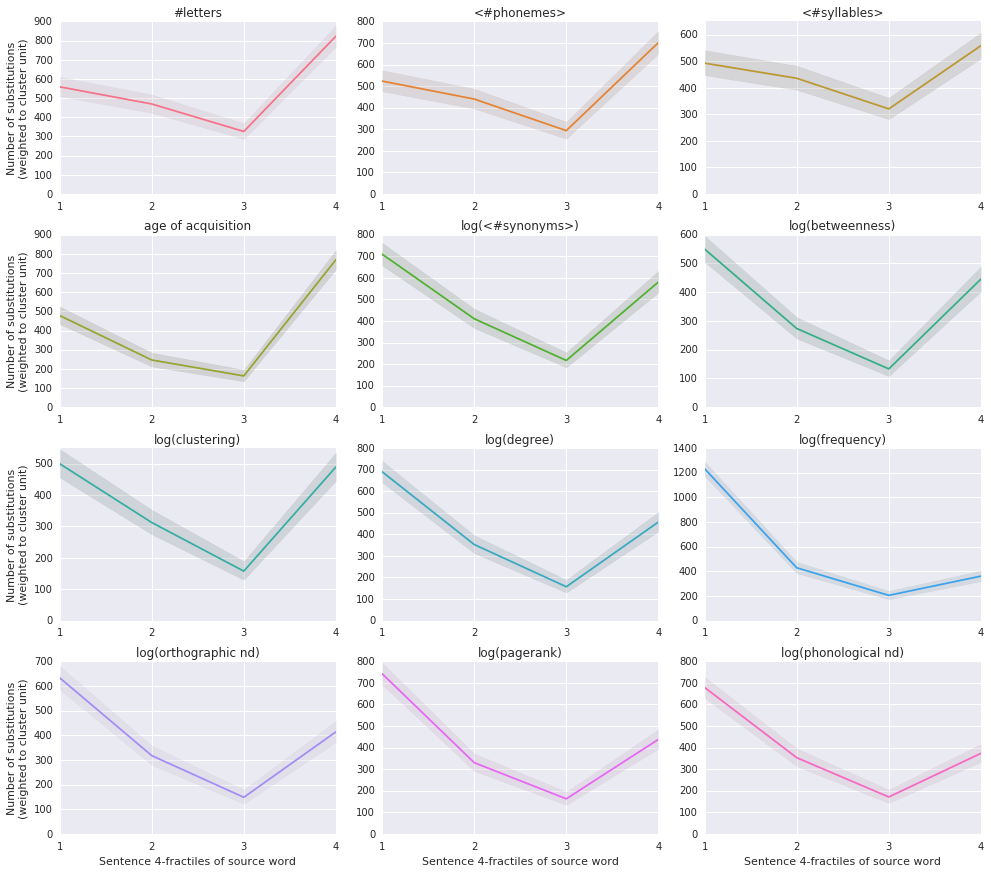

In [20]:
# Now plot.
g = sb.FacetGrid(data=fractiles, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Sentence {}-fractiles of source word'.format(BIN_COUNT))
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-fractile_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're finally in a real multinomial sampling (and it's the only time). So we're going to use multinomial CIs.

### 5.2 Feature susceptibilities, reduced to features we expose in the paper

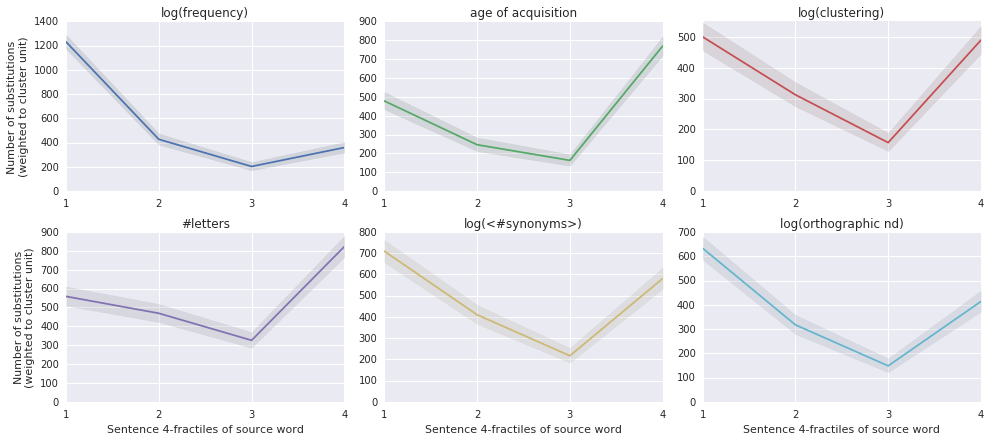

In [21]:
# Now plot.
g = sb.FacetGrid(data=fractiles[fractiles['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Sentence {}-fractiles of source word'.format(BIN_COUNT))
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-fractile_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)